In [1]:
import pandas as pd
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
# Load data dari file Excel

# Abu, jarak 4cm, 5 Sampel data
dfA41 = pd.read_excel('abu90.xlsx', usecols=['t', 'A41']) # Abu Jarak 4 cm sampel 1
dfA42 = pd.read_excel('abu90.xlsx', usecols=['t', 'A42']) # Abu Jarak 4 cm sampel 2
dfA43 = pd.read_excel('abu90.xlsx', usecols=['t', 'A43']) # Abu Jarak 4 cm sampel 3 
dfA44 = pd.read_excel('abu90.xlsx', usecols=['t', 'A44']) # Abu Jarak 4 cm sampel 4
dfA45 = pd.read_excel('abu90.xlsx', usecols=['t', 'A45']) # Abu Jarak 4 cm sampel 5

# Abu, jarak 3cm, 5 Sampel data
dfA31 = pd.read_excel('abu90.xlsx', usecols=['t', 'A31']) # Abu Jarak 3 cm sampel 1
dfA32 = pd.read_excel('abu90.xlsx', usecols=['t', 'A32']) # Abu Jarak 3 cm sampel 2
dfA33 = pd.read_excel('abu90.xlsx', usecols=['t', 'A33']) # Abu Jarak 3 cm sampel 3
dfA34 = pd.read_excel('abu90.xlsx', usecols=['t', 'A34']) # Abu Jarak 3 cm sampel 4
dfA35 = pd.read_excel('abu90.xlsx', usecols=['t', 'A35']) # Abu Jarak 3 cm sampel 5

# Extract data dari kolom masing-masing sampel
time = dfA41['t'].to_numpy()
A41_signal_data = dfA41['A41'].to_numpy()
A42_signal_data = dfA42['A42'].to_numpy()
A43_signal_data = dfA43['A43'].to_numpy()
A44_signal_data = dfA44['A44'].to_numpy()
A45_signal_data = dfA45['A45'].to_numpy()

time = dfA41['t'].to_numpy()
A31_signal_data = dfA31['A31'].to_numpy()
A32_signal_data = dfA32['A32'].to_numpy()
A33_signal_data = dfA33['A33'].to_numpy()
A34_signal_data = dfA34['A34'].to_numpy()
A35_signal_data = dfA35['A35'].to_numpy()

# Abu 90% Jarak 4 cm

## Parameter Filter, Apply Bandpass, Rectify Signal untuk kelima sampel 4 cm

In [3]:
# A41 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
A41_filtered_signal = signal.filtfilt(b, a, A41_signal_data)

# Rectify the signal (take only the positive values)
A41_rectified_signal = np.abs(A41_filtered_signal)

In [4]:
# A42 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
A42_filtered_signal = signal.filtfilt(b, a, A42_signal_data)

# Rectify the signal (take only the positive values)
A42_rectified_signal = np.abs(A42_filtered_signal)

In [5]:
# A43 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
A43_filtered_signal = signal.filtfilt(b, a, A43_signal_data)

# Rectify the signal (take only the positive values)
A43_rectified_signal = np.abs(A43_filtered_signal)

In [6]:
# A44 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
A44_filtered_signal = signal.filtfilt(b, a, A44_signal_data)

# Rectify the signal (take only the positive values)
A44_rectified_signal = np.abs(A44_filtered_signal)

In [7]:
# A45 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
A45_filtered_signal = signal.filtfilt(b, a, A45_signal_data)

# Rectify the signal (take only the positive values)
A45_rectified_signal = np.abs(A45_filtered_signal)

## Tranformasi Fourier, One-sided FFT dan PSD

In [8]:
# A41
# Perform Fourier transform
A41_signal_fft = np.fft.fft(A41_filtered_signal)
A41_signal_freq = np.fft.fftfreq(len(A41_filtered_signal), 1/fs)

# Perform one-sided FFT (discard negative frequencies)
A41_n = len(A41_filtered_signal)
A41_freq = A41_signal_freq[0:int(A41_n/2)]
A41_fft_amp = np.abs(A41_signal_fft)[0:int(A41_n/2)]/A41_n*2

# Perform power spectral density (PSD) calculation
A41_psd = (1/(fs*A41_n)) * np.square(np.abs(A41_signal_fft[:A41_n//2]))

# Perform one-sided PSD (discard negative frequencies)
A41_freq_psd = A41_signal_freq[0:int(A41_n/2)]
A41_psd_one_sided = A41_psd[0:int(A41_n/2)]

In [9]:
# A42
# Perform Fourier Transform
A42_signal_fft = np.fft.fft(A42_filtered_signal)
A42_signal_freq = np.fft.fftfreq(len(A42_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
A42_n = len(A42_filtered_signal)
A42_freq = A42_signal_freq[0:int(A42_n/2)]
A42_fft_amp = np.abs(A42_signal_fft)[0:int(A42_n/2)]/A42_n*2

# Perform power spectral density (PSD) calculation
A42_psd = (1/(fs*A41_n)) * np.square(np.abs(A42_signal_fft[:A42_n//2]))

# Perform one-sided PSD (discard negative frequencies)
A42_freq_psd = A42_signal_freq[0:int(A42_n/2)]
A42_psd_one_sided = A42_psd[0:int(A42_n/2)]

In [10]:
# A43
# Perform Fourier Transform
A43_signal_fft = np.fft.fft(A43_filtered_signal)
A43_signal_freq = np.fft.fftfreq(len(A43_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
A43_n = len(A43_filtered_signal)
A43_freq = A43_signal_freq[0:int(A43_n/2)]
A43_fft_amp = np.abs(A43_signal_fft)[0:int(A43_n/2)]/A43_n*2

# Perform power spectral density (PSD) calculation
A43_psd = (1/(fs*A43_n)) * np.square(np.abs(A43_signal_fft[:A43_n//2]))

# Perform one-sided PSD (discard negative frequencies)
A43_freq_psd = A43_signal_freq[0:int(A43_n/2)]
A43_psd_one_sided = A43_psd[0:int(A43_n/2)]

In [11]:
# A44
# Perform Fourier Transform
A44_signal_fft = np.fft.fft(A44_filtered_signal)
A44_signal_freq = np.fft.fftfreq(len(A44_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
A44_n = len(A43_filtered_signal)
A44_freq = A44_signal_freq[0:int(A44_n/2)]
# A44_fft_amp - np.abs(A42_signal_fft)[0:int(A44_n/2)]/A44_n*2
A44_fft_amp = np.abs(A44_signal_fft)[0:int(A44_n/2)]/A44_n*2

# Perform power spectral density (PSD) calculation
A44_psd = (1/(fs*A44_n)) * np.square(np.abs(A44_signal_fft[:A44_n//2]))

# Perform one-sided PSD (discard negative frequencies)
A44_freq_psd = A44_signal_freq[0:int(A44_n/2)]
A44_psd_one_sided = A44_psd[0:int(A44_n/2)]

In [12]:
# A45
# Perform Fourier Transform
A45_signal_fft = np.fft.fft(A44_filtered_signal)
A45_signal_freq = np.fft.fftfreq(len(A45_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
A45_n = len(A45_filtered_signal)
A45_freq = A45_signal_freq[0:int(A45_n/2)]
A45_fft_amp = np.abs(A45_signal_fft)[0:int(A45_n/2)]/A45_n*2

# Perform power spectral density (PSD) calculation
A45_psd = (1/(fs*A44_n)) * np.square(np.abs(A45_signal_fft[:A45_n//2]))

# Perform one-sided PSD (discard negative frequencies)
A45_freq_psd = A45_signal_freq[0:int(A45_n/2)]
A45_psd_one_sided = A45_psd[0:int(A45_n/2)]

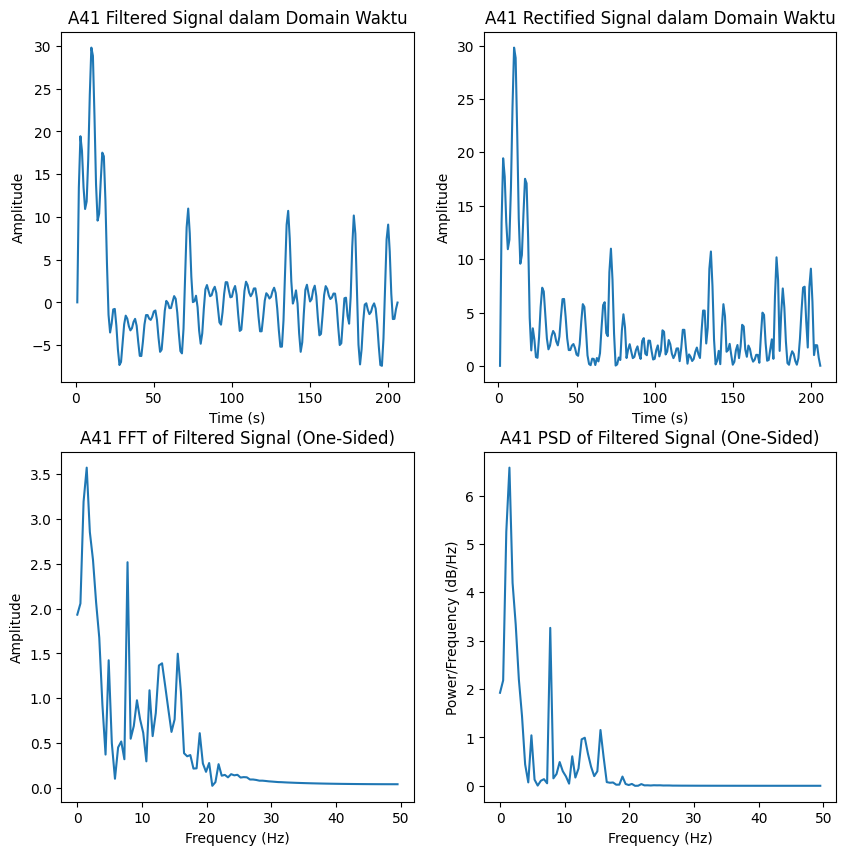

In [13]:
# A41
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, A41_filtered_signal)
axs[0, 0].set_title('A41 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, A41_rectified_signal)
axs[0, 1].set_title('A41 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(A41_freq, A41_fft_amp)
axs[1, 0].set_title('A41 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(A41_freq_psd, A41_psd_one_sided)
axs[1, 1].set_title('A41 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Abu_4cm_sampel_1.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

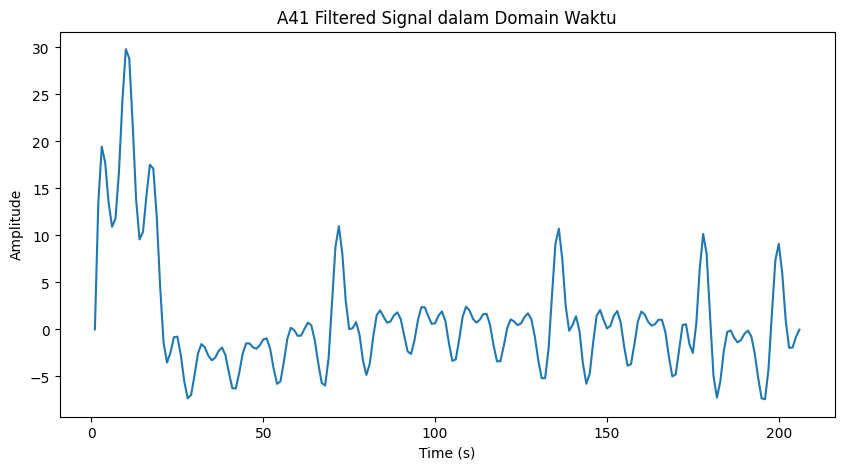

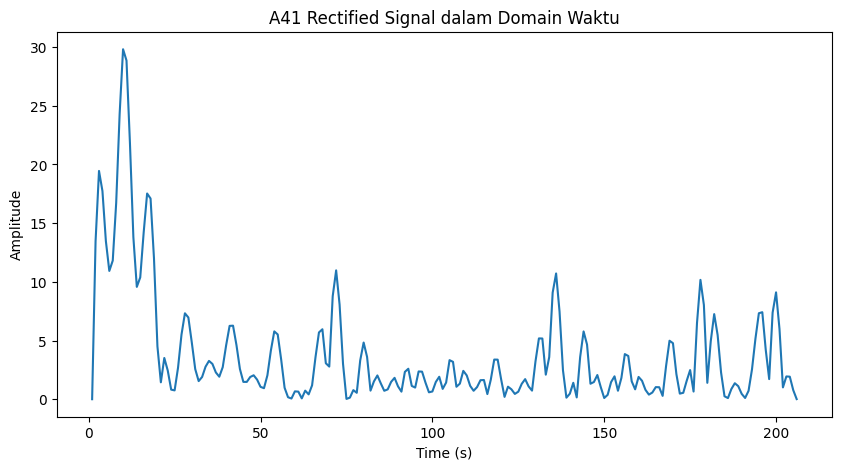

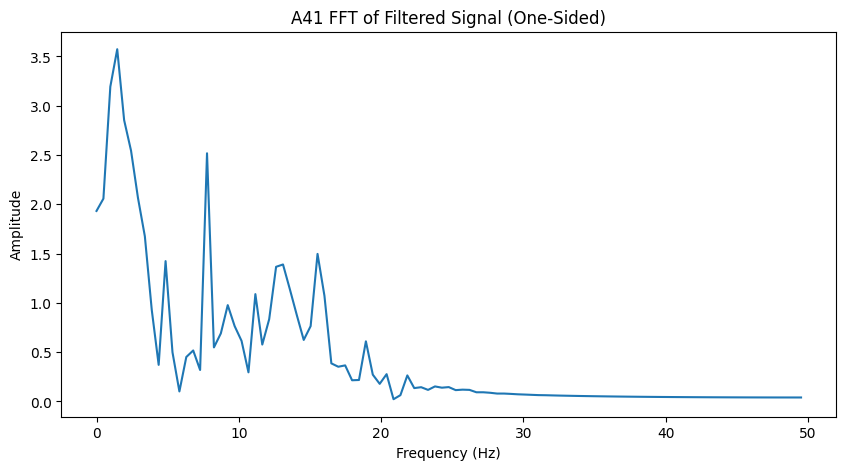

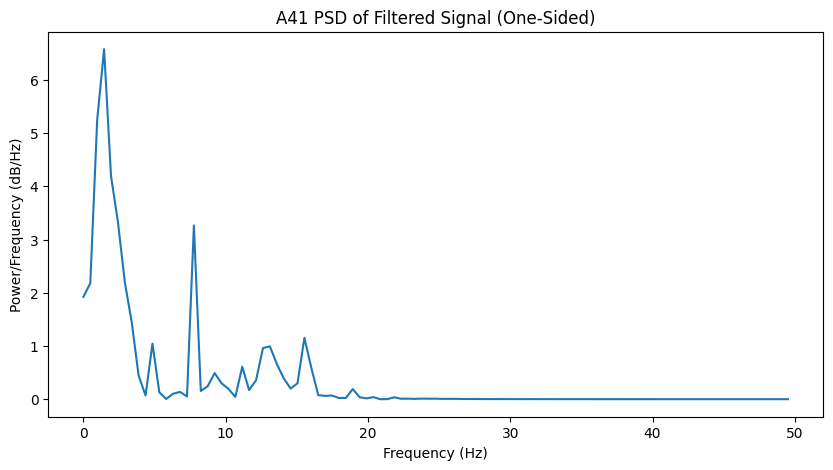

In [14]:
plt.figure(figsize=(10,5))
plt.plot(time, A41_filtered_signal)
plt.title('A41 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, A41_rectified_signal)
plt.title('A41 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A41_freq, A41_fft_amp)
plt.title('A41 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A41_freq_psd, A41_psd_one_sided)
plt.title('A41 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

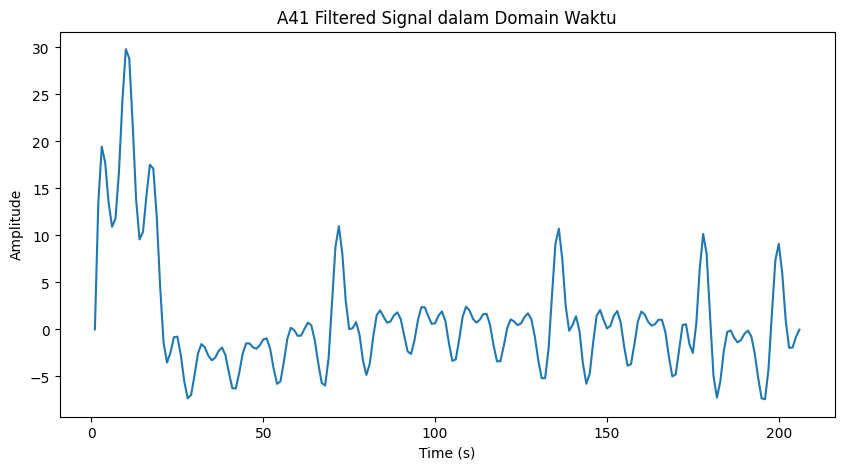

In [15]:
plt.figure(figsize=(10,5))
plt.plot(time, A41_filtered_signal)
plt.title('A41 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

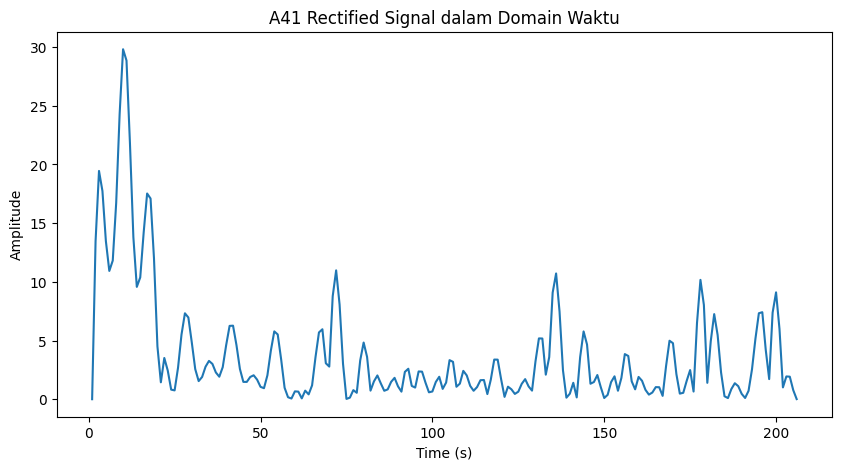

In [16]:
plt.figure(figsize=(10,5))
plt.plot(time, A41_rectified_signal)
plt.title('A41 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

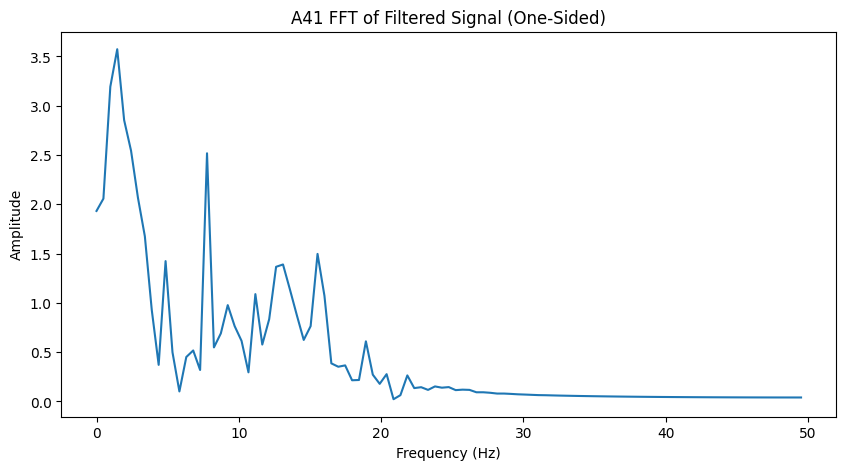

In [17]:
plt.figure(figsize=(10,5))
plt.plot(A41_freq, A41_fft_amp)
plt.title('A41 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

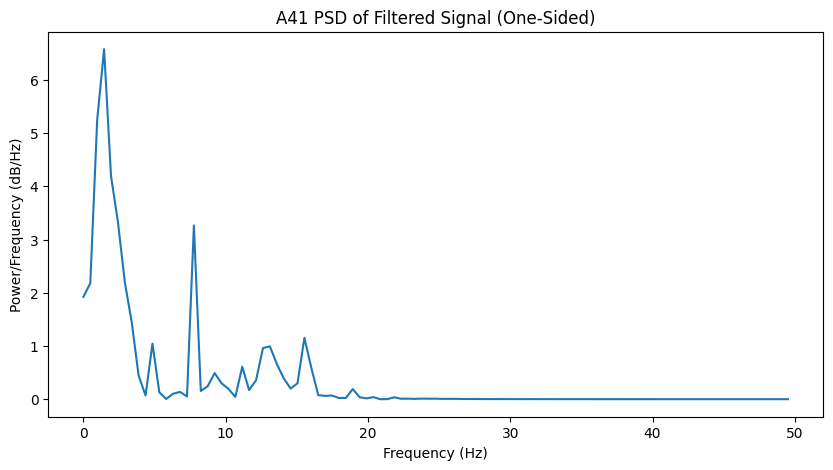

In [18]:
plt.figure(figsize=(10,5))
plt.plot(A41_freq_psd, A41_psd_one_sided)
plt.title('A41 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

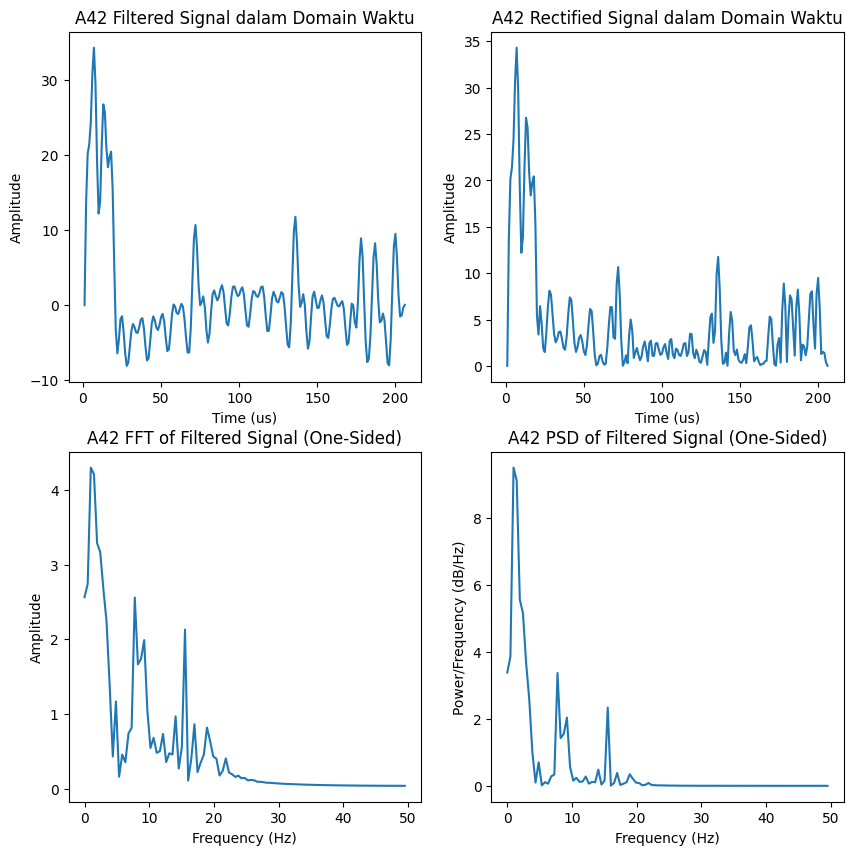

In [19]:
# A42
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, A42_filtered_signal)
axs[0, 0].set_title('A42 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, A42_rectified_signal)
axs[0, 1].set_title('A42 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(A42_freq, A42_fft_amp)
axs[1, 0].set_title('A42 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(A42_freq_psd, A42_psd_one_sided)
axs[1, 1].set_title('A42 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Abu_4cm_sampel_2.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

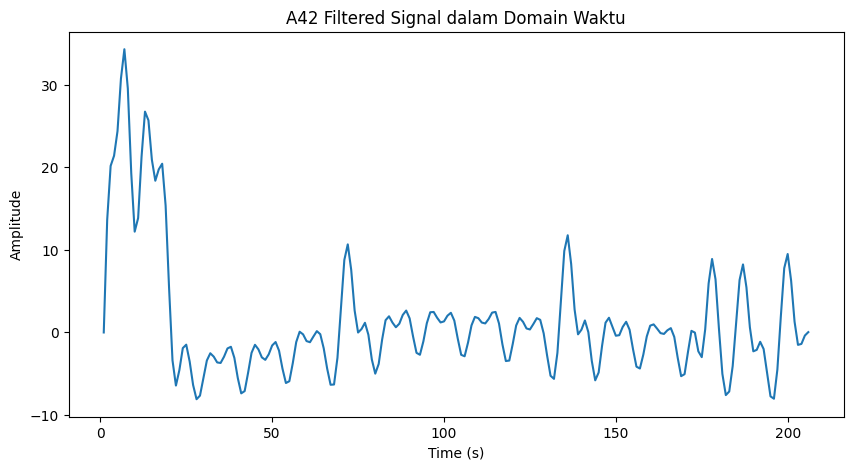

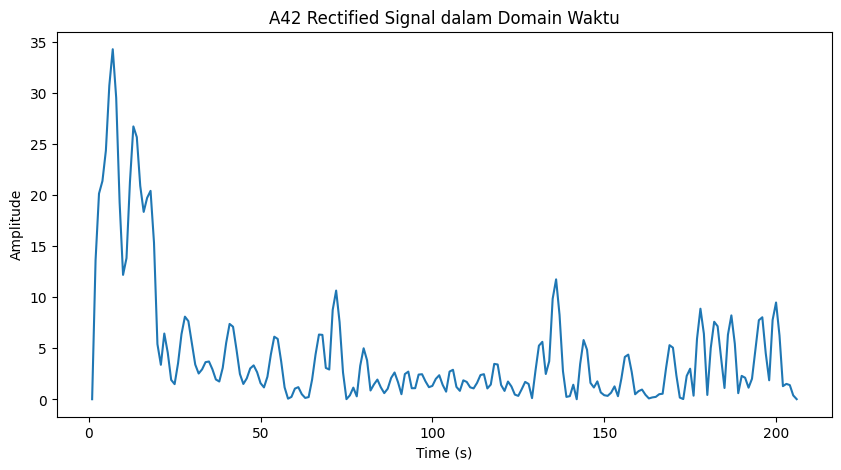

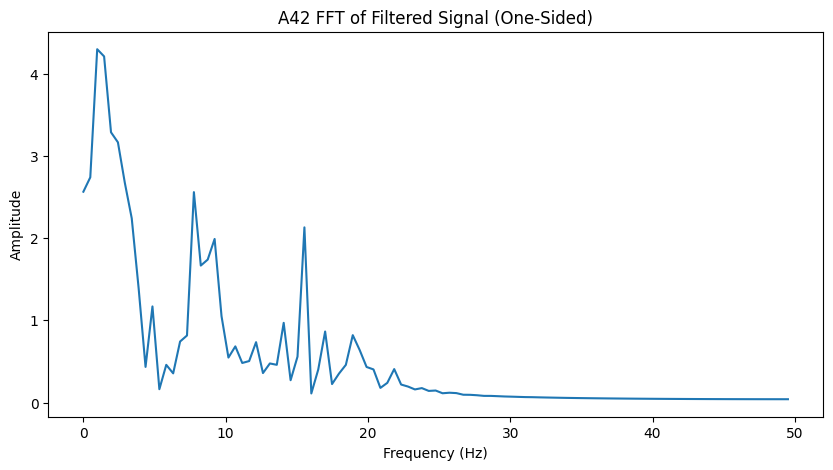

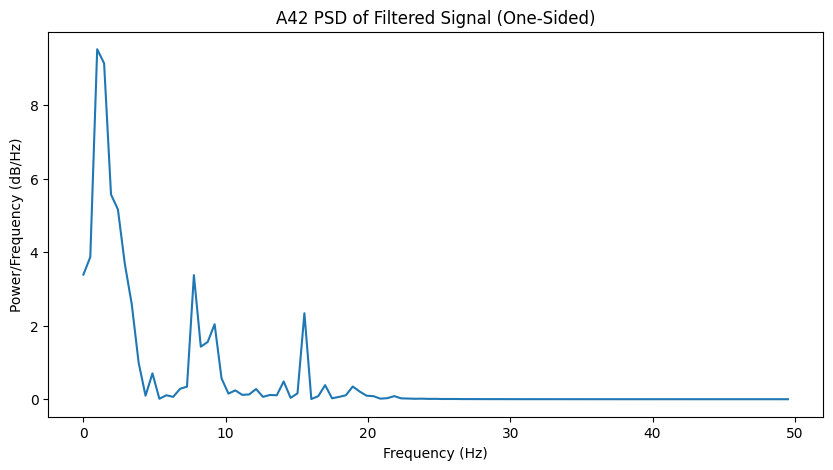

In [20]:
plt.figure(figsize=(10,5))
plt.plot(time, A42_filtered_signal)
plt.title('A42 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, A42_rectified_signal)
plt.title('A42 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A42_freq, A42_fft_amp)
plt.title('A42 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A42_freq_psd, A42_psd_one_sided)
plt.title('A42 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

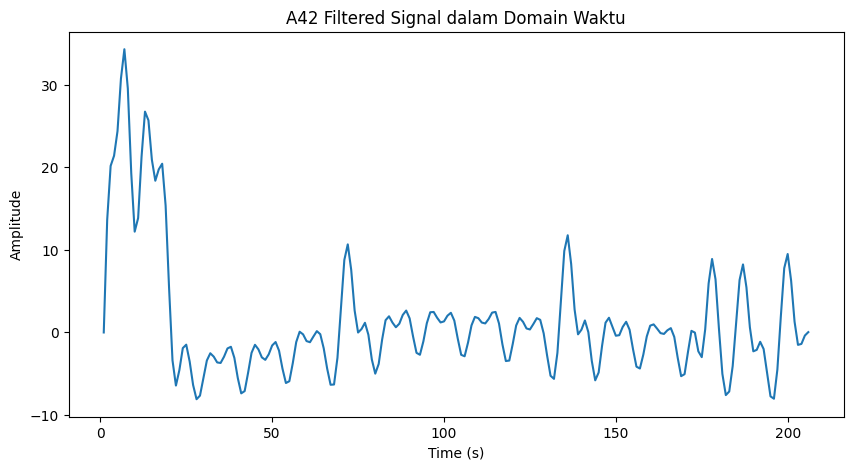

In [21]:
plt.figure(figsize=(10,5))
plt.plot(time, A42_filtered_signal)
plt.title('A42 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

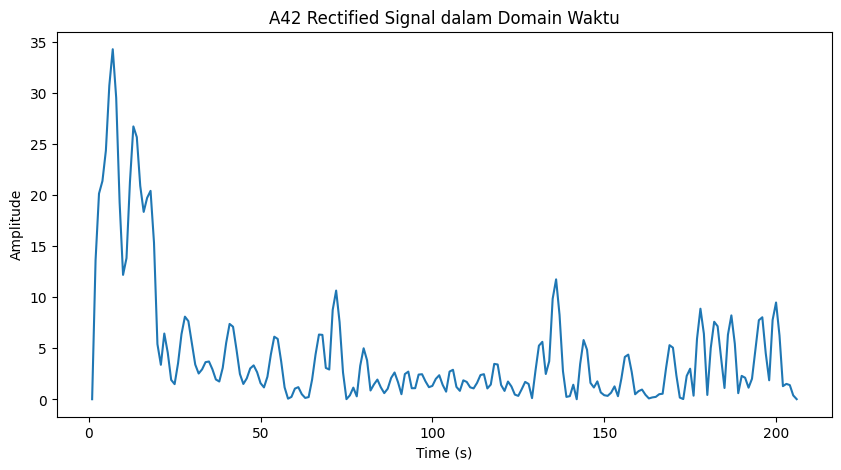

In [22]:
plt.figure(figsize=(10,5))
plt.plot(time, A42_rectified_signal)
plt.title('A42 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

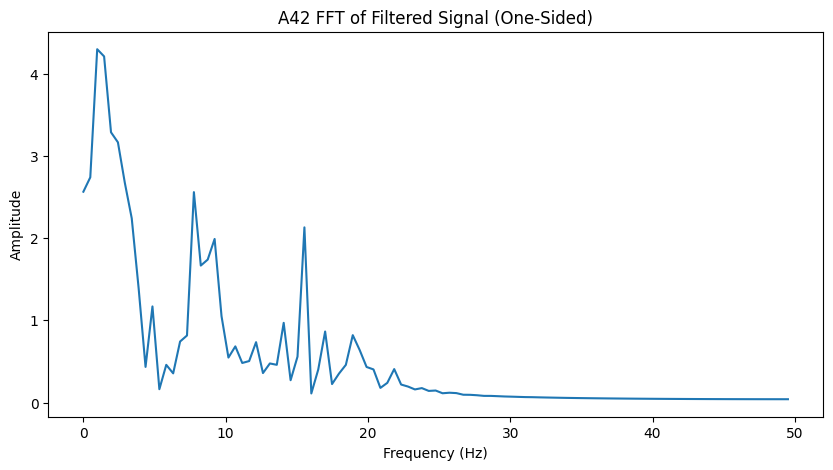

In [23]:
plt.figure(figsize=(10,5))
plt.plot(A42_freq, A42_fft_amp)
plt.title('A42 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

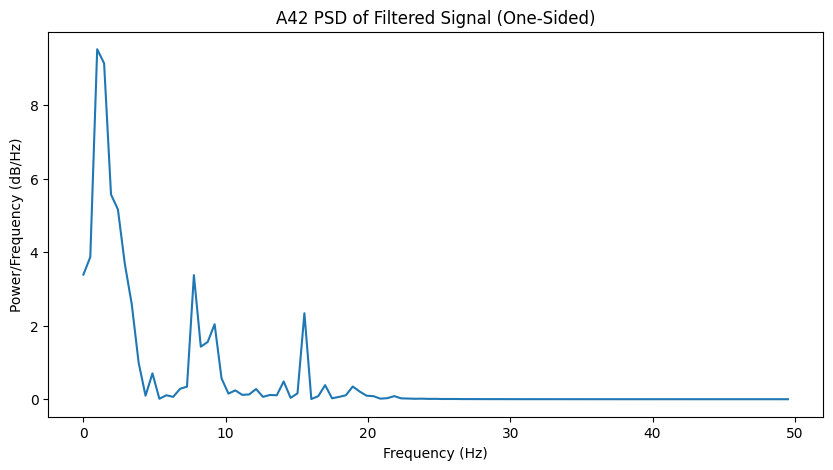

In [24]:
plt.figure(figsize=(10,5))
plt.plot(A42_freq_psd, A42_psd_one_sided)
plt.title('A42 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

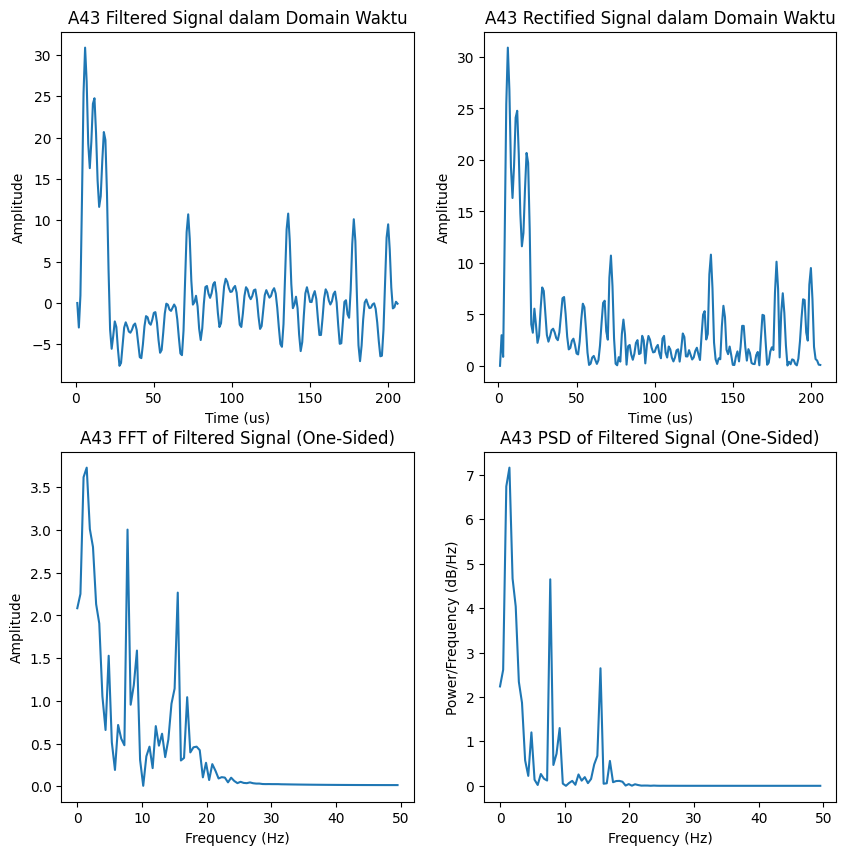

In [25]:
# A43
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, A43_filtered_signal)
axs[0, 0].set_title('A43 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, A43_rectified_signal)
axs[0, 1].set_title('A43 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(A43_freq, A43_fft_amp)
axs[1, 0].set_title('A43 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(A43_freq_psd, A43_psd_one_sided)
axs[1, 1].set_title('A43 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Abu_4cm_sampel_3.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

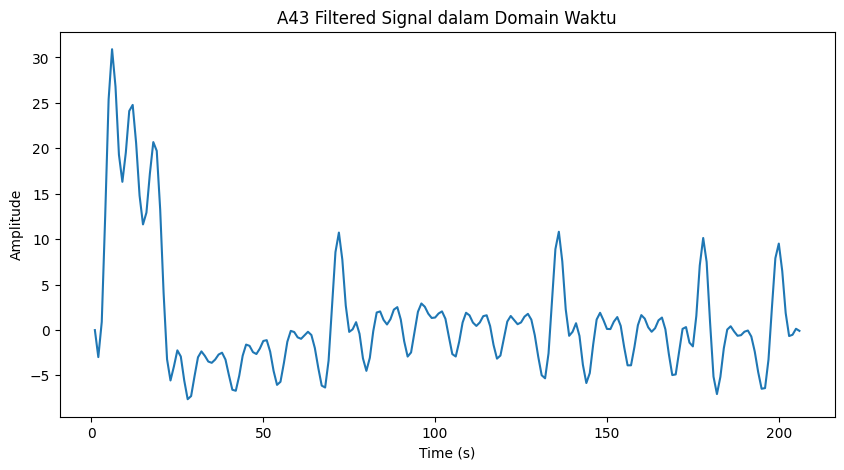

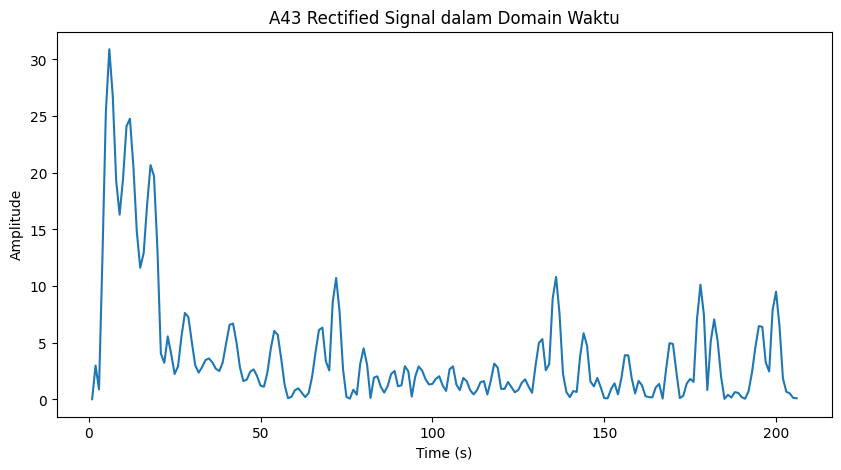

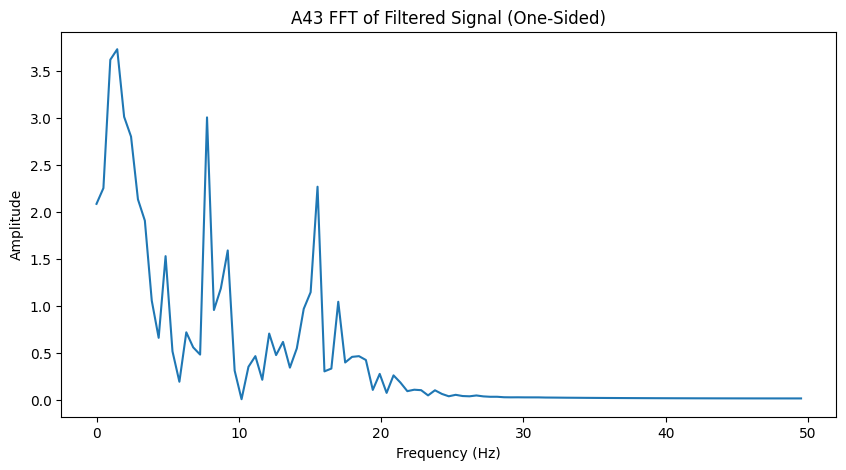

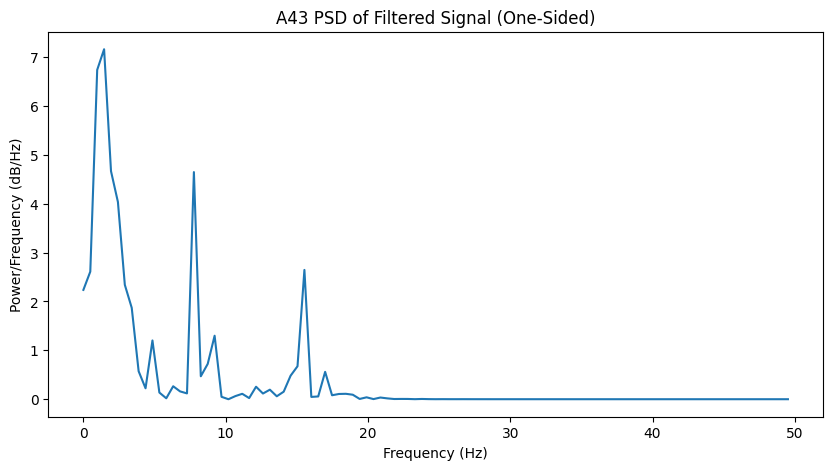

In [26]:
plt.figure(figsize=(10,5))
plt.plot(time, A43_filtered_signal)
plt.title('A43 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, A43_rectified_signal)
plt.title('A43 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A43_freq, A43_fft_amp)
plt.title('A43 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A43_freq_psd, A43_psd_one_sided)
plt.title('A43 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

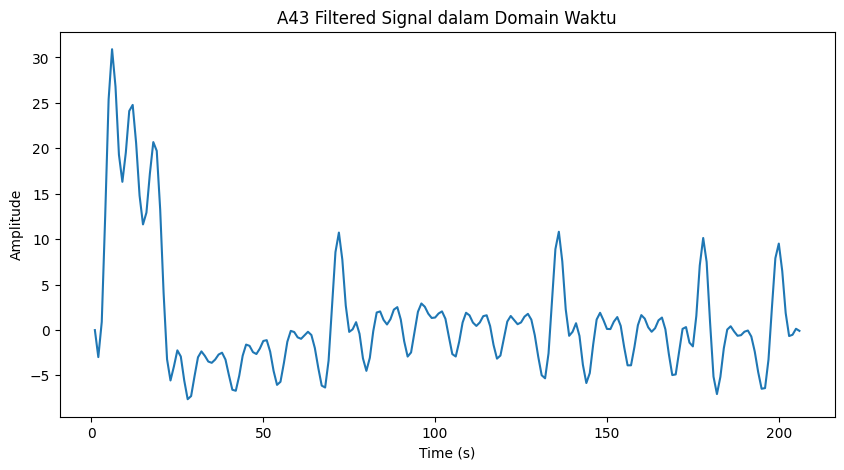

In [27]:
plt.figure(figsize=(10,5))
plt.plot(time, A43_filtered_signal)
plt.title('A43 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

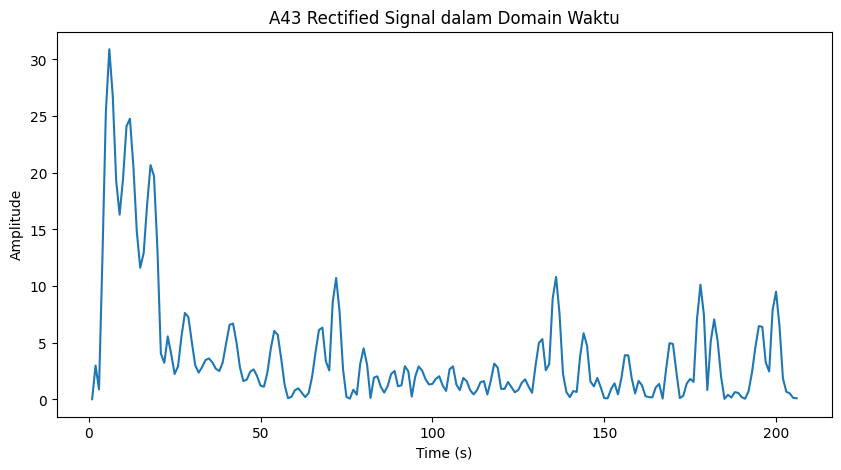

In [28]:
plt.figure(figsize=(10,5))
plt.plot(time, A43_rectified_signal)
plt.title('A43 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

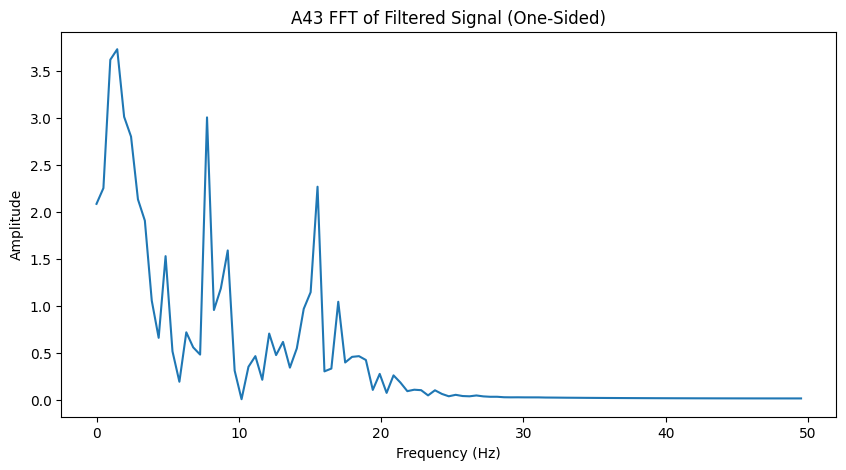

In [29]:
plt.figure(figsize=(10,5))
plt.plot(A43_freq, A43_fft_amp)
plt.title('A43 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

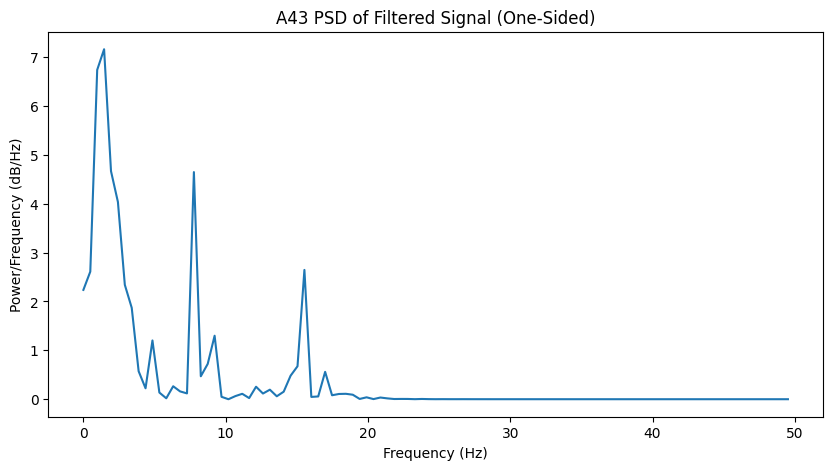

In [30]:
plt.figure(figsize=(10,5))
plt.plot(A43_freq_psd, A43_psd_one_sided)
plt.title('A43 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

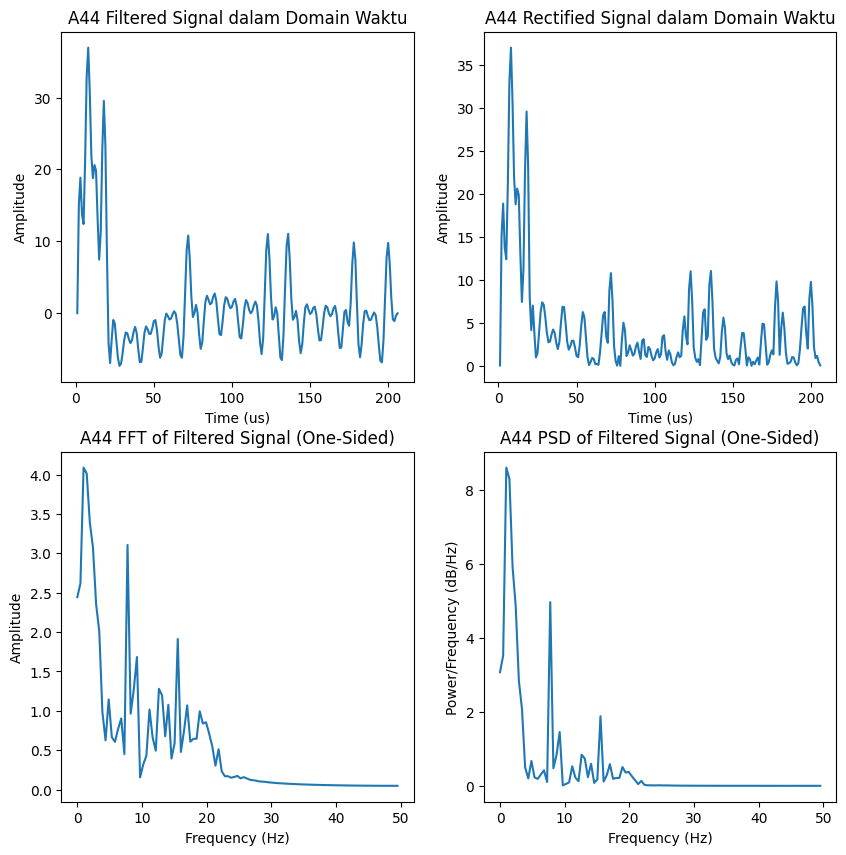

In [31]:
# A44
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, A44_filtered_signal)
axs[0, 0].set_title('A44 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, A44_rectified_signal)
axs[0, 1].set_title('A44 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(A44_freq, A44_fft_amp)
axs[1, 0].set_title('A44 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(A44_freq_psd, A44_psd_one_sided)
axs[1, 1].set_title('A44 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Abu_4cm_sampel_4.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

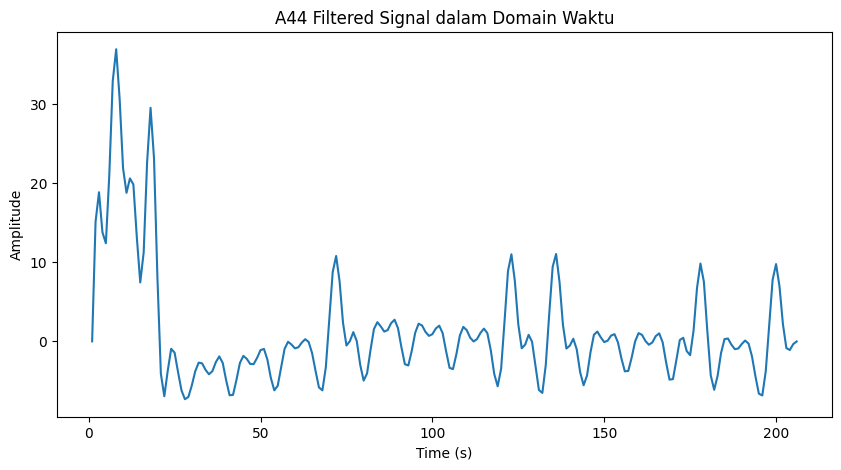

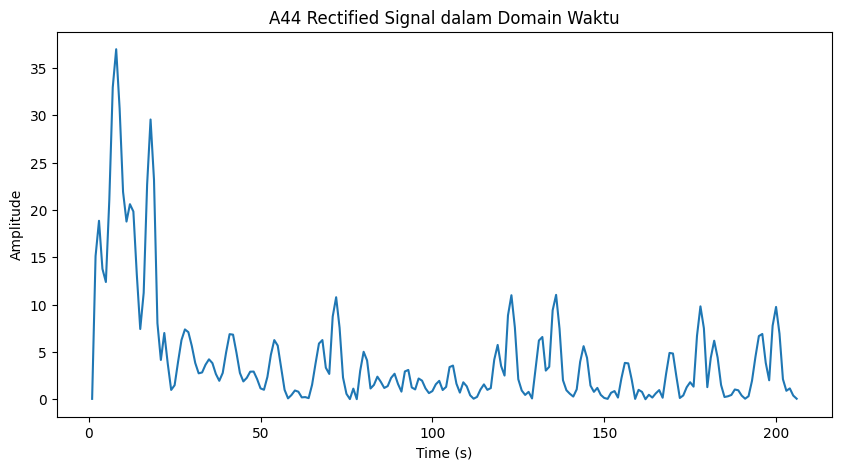

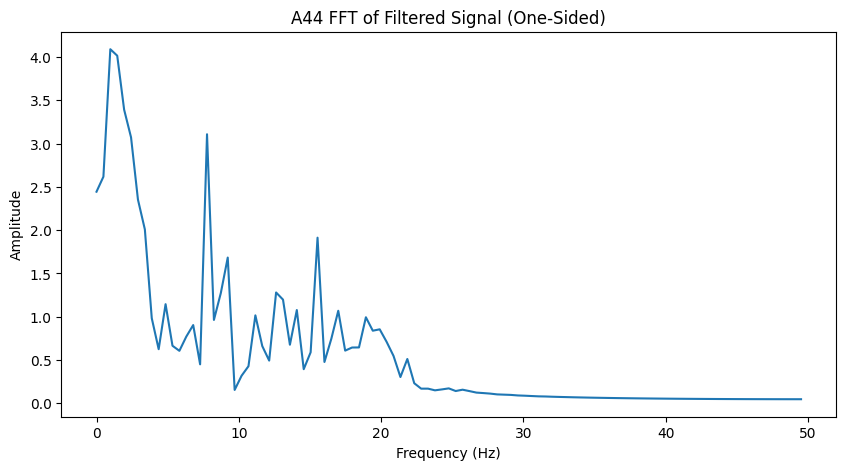

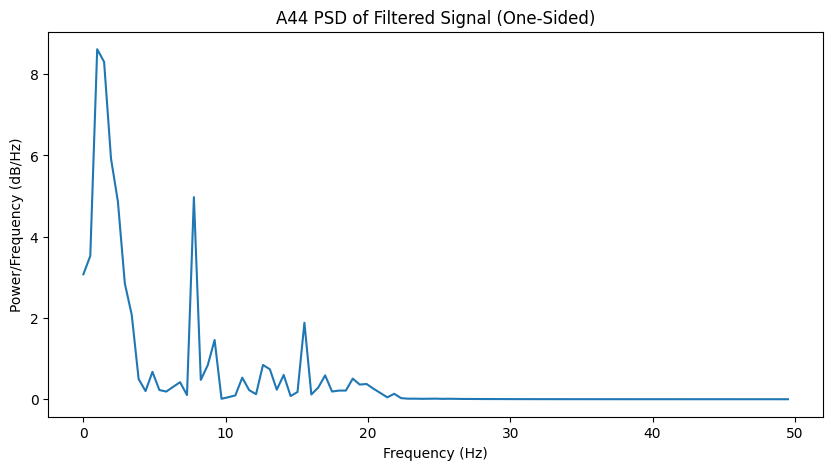

In [32]:
plt.figure(figsize=(10,5))
plt.plot(time, A44_filtered_signal)
plt.title('A44 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, A44_rectified_signal)
plt.title('A44 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A44_freq, A44_fft_amp)
plt.title('A44 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A44_freq_psd, A44_psd_one_sided)
plt.title('A44 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

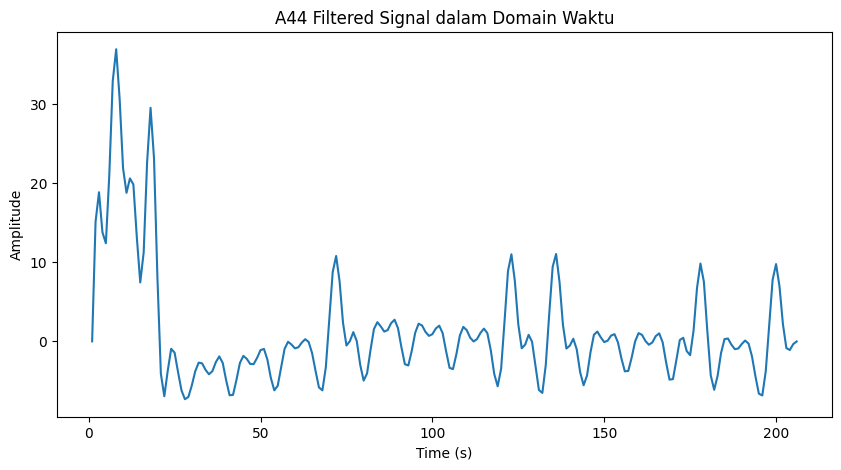

In [33]:
plt.figure(figsize=(10,5))
plt.plot(time, A44_filtered_signal)
plt.title('A44 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

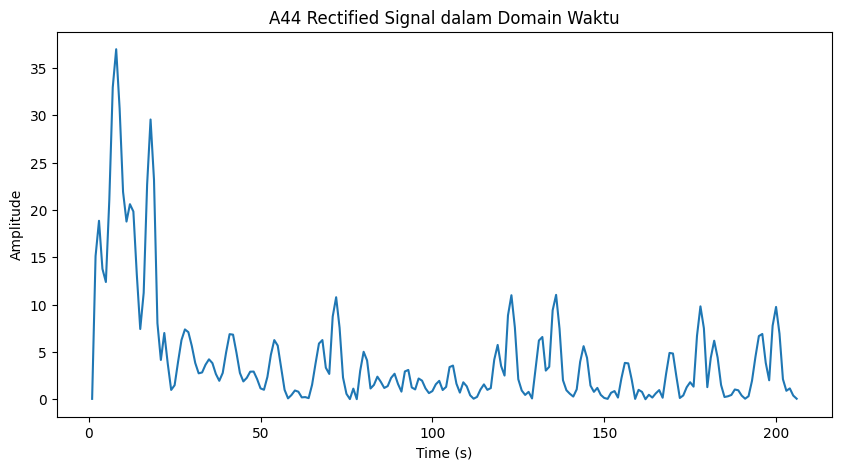

In [34]:
plt.figure(figsize=(10,5))
plt.plot(time, A44_rectified_signal)
plt.title('A44 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

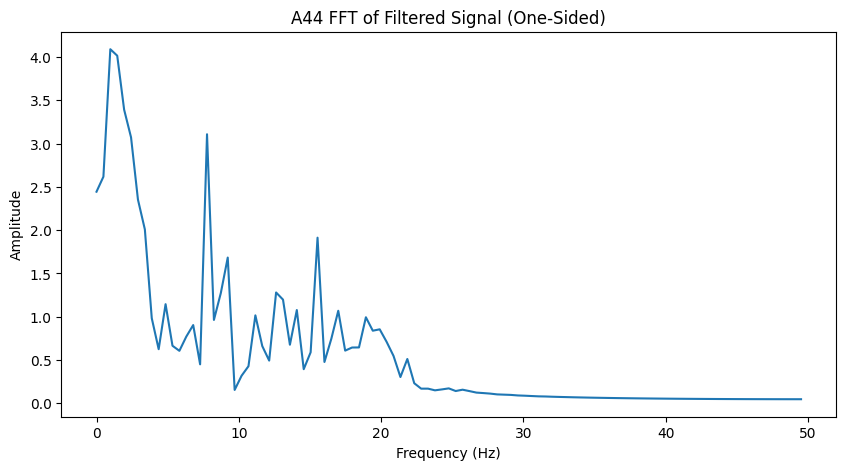

In [35]:
plt.figure(figsize=(10,5))
plt.plot(A44_freq, A44_fft_amp)
plt.title('A44 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

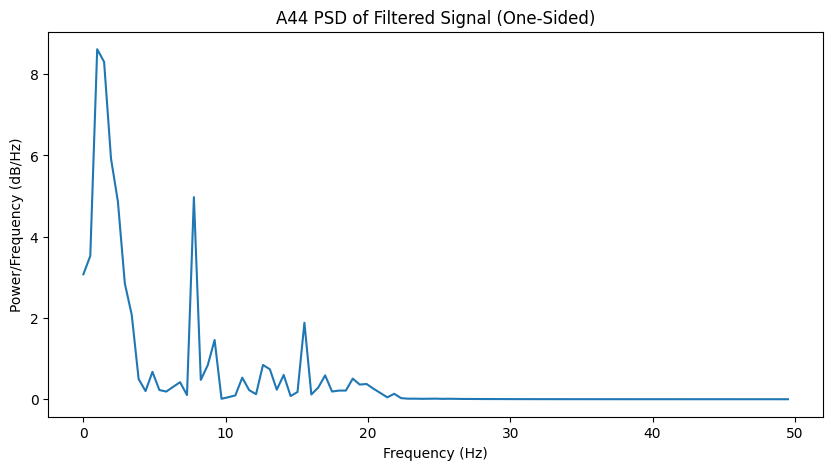

In [36]:
plt.figure(figsize=(10,5))
plt.plot(A44_freq_psd, A44_psd_one_sided)
plt.title('A44 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

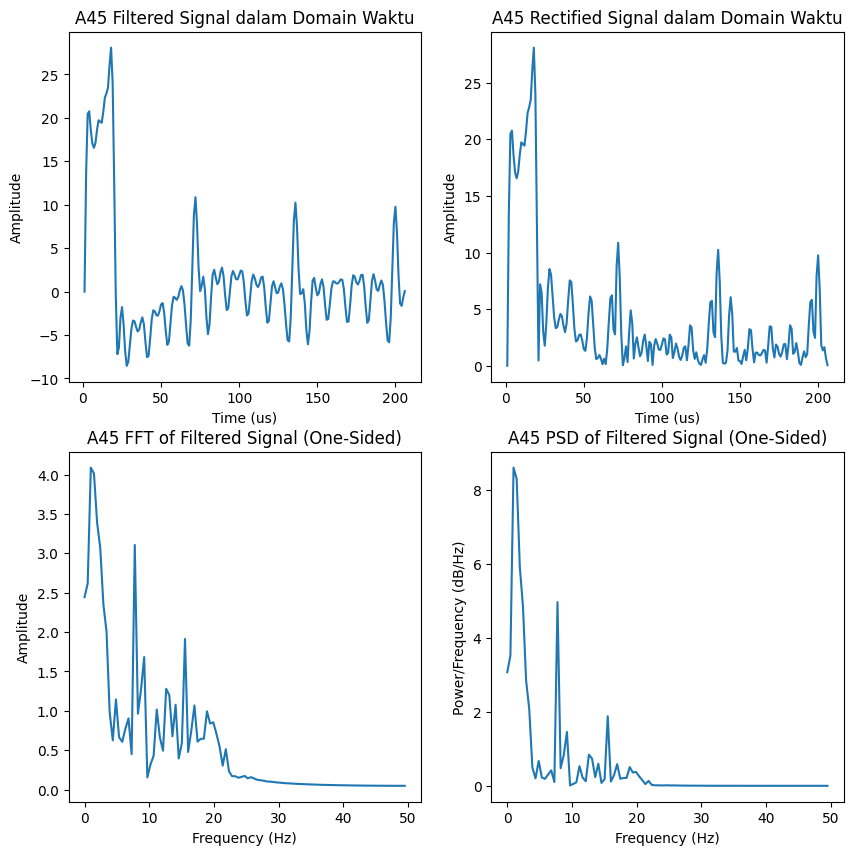

In [37]:
# A45
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, A45_filtered_signal)
axs[0, 0].set_title('A45 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, A45_rectified_signal)
axs[0, 1].set_title('A45 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(A45_freq, A45_fft_amp)
axs[1, 0].set_title('A45 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(A45_freq_psd, A45_psd_one_sided)
axs[1, 1].set_title('A45 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Abu_4cm_sampel_5.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

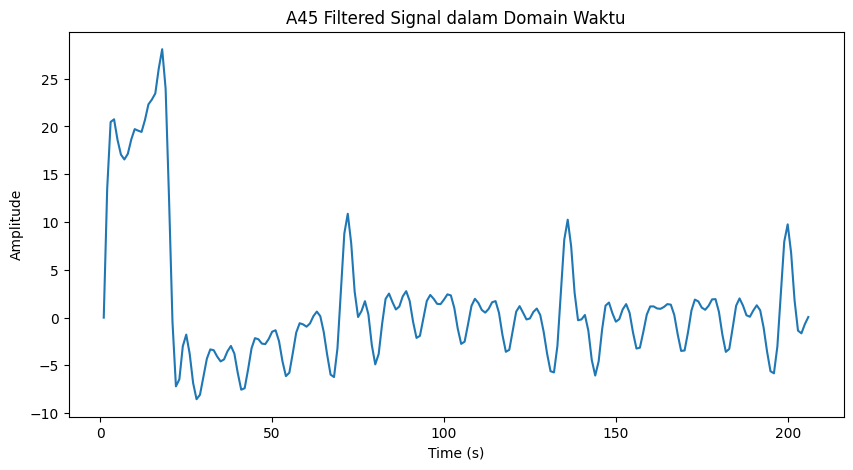

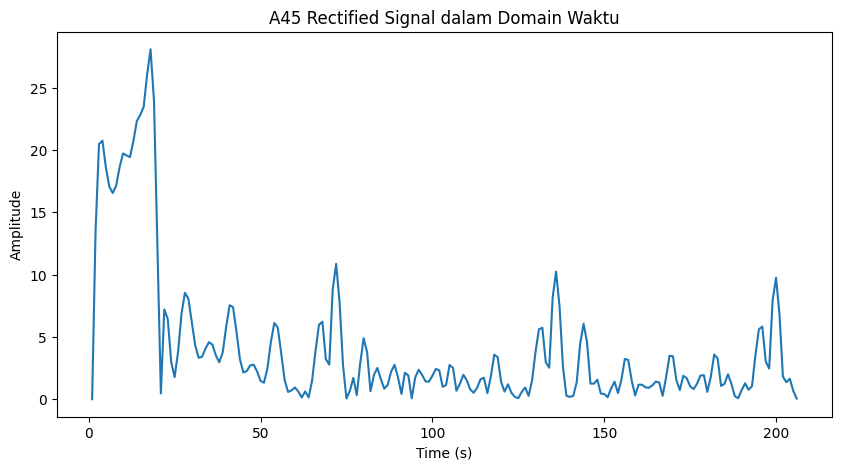

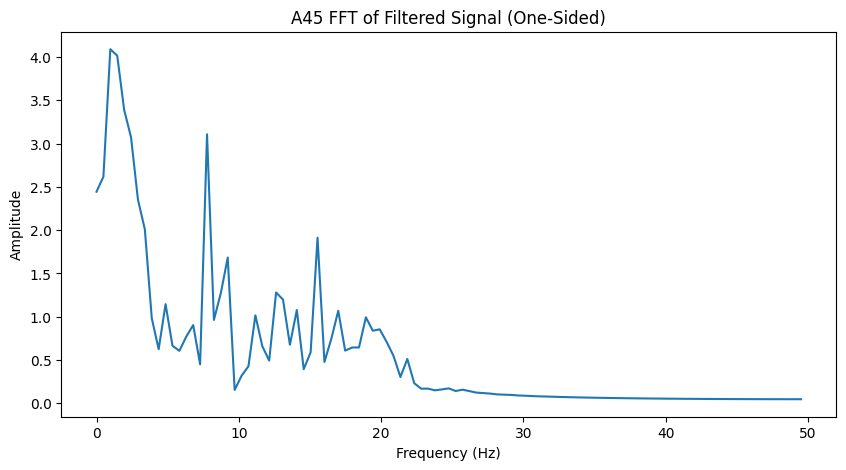

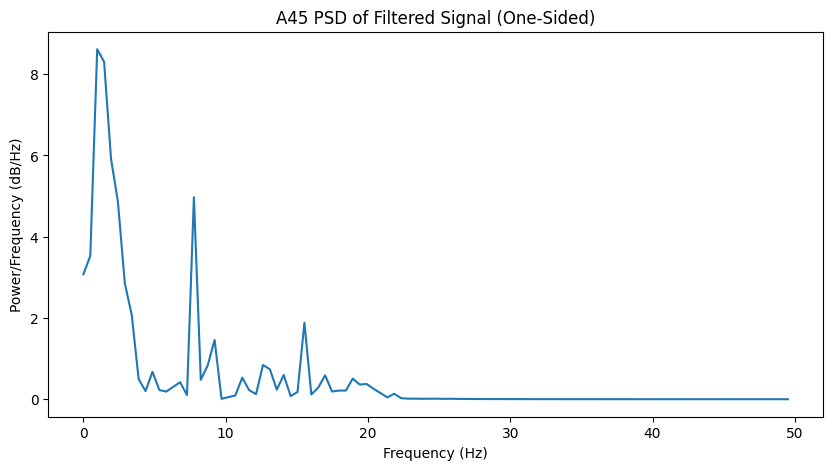

In [38]:
plt.figure(figsize=(10,5))
plt.plot(time, A45_filtered_signal)
plt.title('A45 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, A45_rectified_signal)
plt.title('A45 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A45_freq, A45_fft_amp)
plt.title('A45 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A45_freq_psd, A45_psd_one_sided)
plt.title('A45 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

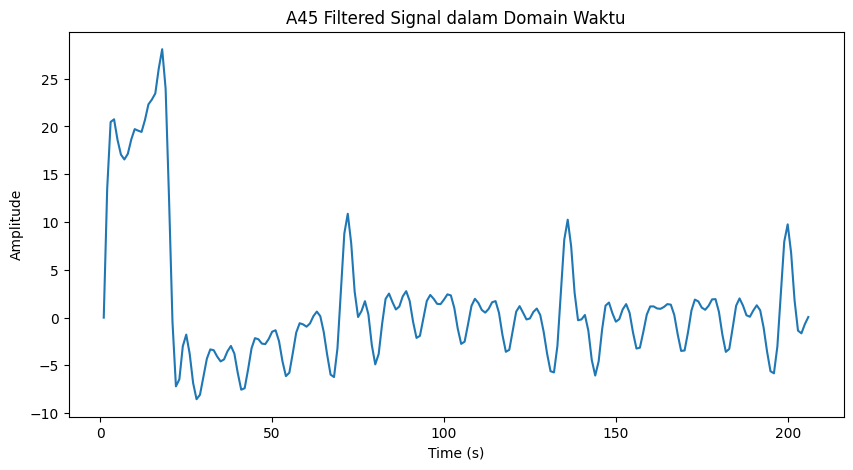

In [39]:
plt.figure(figsize=(10,5))
plt.plot(time, A45_filtered_signal)
plt.title('A45 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

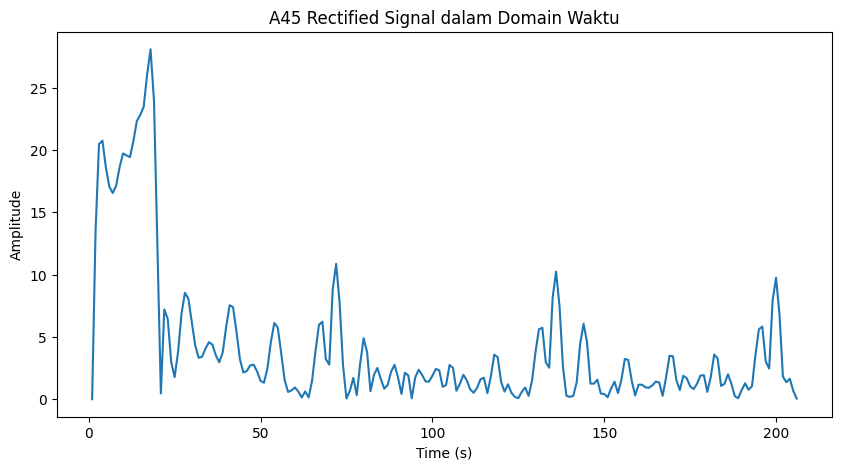

In [40]:
plt.figure(figsize=(10,5))
plt.plot(time, A45_rectified_signal)
plt.title('A45 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

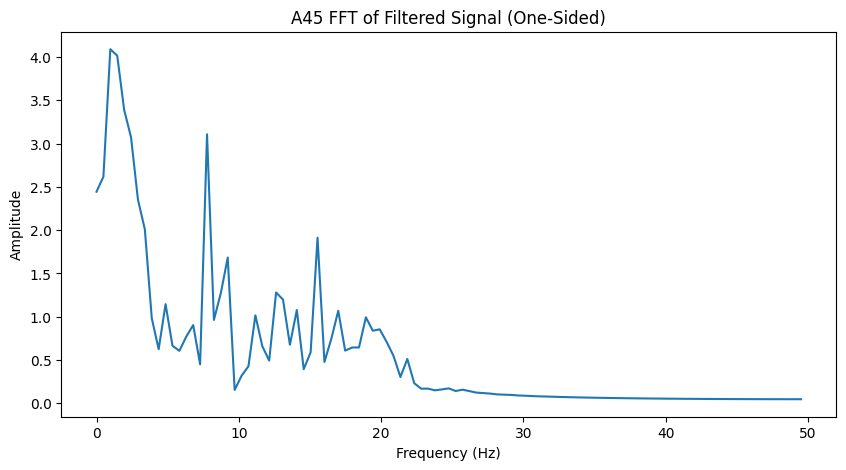

In [41]:
plt.figure(figsize=(10,5))
plt.plot(A45_freq, A45_fft_amp)
plt.title('A45 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

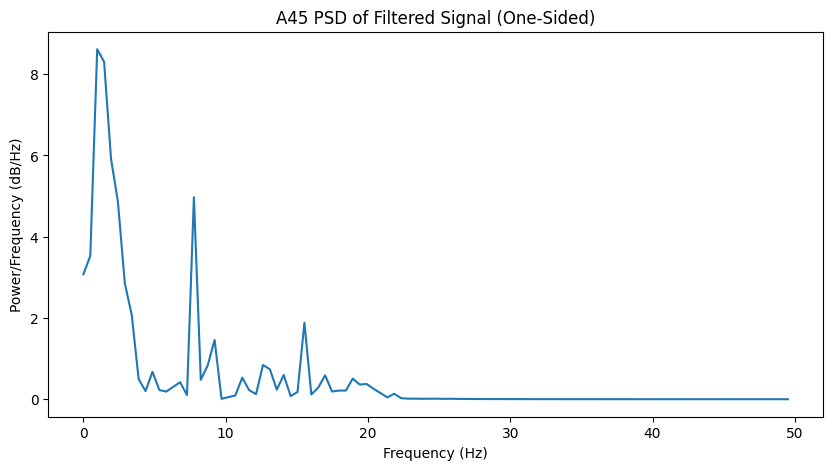

In [42]:
plt.figure(figsize=(10,5))
plt.plot(A45_freq_psd, A45_psd_one_sided)
plt.title('A45 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

# Abu 90% Jarak 3 cm


## Parameter Filter, Apply Bandpass, Rectify Signal untuk kelima sampel 3 cm

In [43]:
# A31 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
A31_filtered_signal = signal.filtfilt(b, a, A31_signal_data)

# Rectify the signal (take only the positive values)
A31_rectified_signal = np.abs(A31_filtered_signal)

In [44]:
# A32 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
A32_filtered_signal = signal.filtfilt(b, a, A32_signal_data)

# Rectify the signal (take only the positive values)
A32_rectified_signal = np.abs(A32_filtered_signal)

In [45]:
# A33 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
A33_filtered_signal = signal.filtfilt(b, a, A33_signal_data)

# Rectify the signal (take only the positive values)
A33_rectified_signal = np.abs(A33_filtered_signal)

In [46]:
# A34 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
A34_filtered_signal = signal.filtfilt(b, a, A34_signal_data)

# Rectify the signal (take only the positive values)
A34_rectified_signal = np.abs(A34_filtered_signal)

In [47]:
# A35 
# Define the filter parameters
lowcut = 1.0
highcut = 20.0
fs = 100.0
order = 5

# Apply a bandpass filter to the signal
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = signal.butter(order, [low, high], btype='band')
A35_filtered_signal = signal.filtfilt(b, a, A35_signal_data)

# Rectify the signal (take only the positive values)
A35_rectified_signal = np.abs(A35_filtered_signal)

## Tranformasi Fourier, One-sided FFT dan PSD

In [48]:
# A31
# Perform Fourier Transform
A31_signal_fft = np.fft.fft(A31_filtered_signal)
A31_signal_freq = np.fft.fftfreq(len(A31_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
A31_n = len(A31_filtered_signal)
A31_freq = A31_signal_freq[0:int(A31_n/2)]
A31_fft_amp = np.abs(A31_signal_fft)[0:int(A31_n/2)]/A31_n*2

# Perform power spectral density (PSD) calculation
A31_psd = (1/(fs*A31_n)) * np.square(np.abs(A31_signal_fft[:A31_n//2]))

# Perform one-sided PSD (discard negative frequencies)
A31_freq_psd = A31_signal_freq[0:int(A31_n/2)]
A31_psd_one_sided = A31_psd[0:int(A31_n/2)]

In [49]:
# A32
# Perform Fourier Transform
A32_signal_fft = np.fft.fft(A32_filtered_signal)
A32_signal_freq = np.fft.fftfreq(len(A32_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
A32_n = len(A32_filtered_signal)
A32_freq = A32_signal_freq[0:int(A32_n/2)]
A32_fft_amp = np.abs(A32_signal_fft)[0:int(A32_n/2)]/A32_n*2

# Perform power spectral density (PSD) calculation
A32_psd = (1/(fs*A32_n)) * np.square(np.abs(A32_signal_fft[:A32_n//2]))

# Perform one-sided PSD (discard negative frequencies)
A32_freq_psd = A32_signal_freq[0:int(A32_n/2)]
A32_psd_one_sided = A32_psd[0:int(A32_n/2)]

In [50]:
# A33
# Perform Fourier Transform
A33_signal_fft = np.fft.fft(A33_filtered_signal)
A33_signal_freq = np.fft.fftfreq(len(A33_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
A33_n = len(A33_filtered_signal)
A33_freq = A33_signal_freq[0:int(A33_n/2)]
A33_fft_amp = np.abs(A33_signal_fft)[0:int(A33_n/2)]/A33_n*2

# Perform power spectral density (PSD) calculation
A33_psd = (1/(fs*A33_n)) * np.square(np.abs(A33_signal_fft[:A33_n//2]))

# Perform one-sided PSD (discard negative frequencies)
A33_freq_psd = A33_signal_freq[0:int(A33_n/2)]
A33_psd_one_sided = A33_psd[0:int(A33_n/2)]

In [51]:
# A34
# Perform Fourier Transform
A34_signal_fft = np.fft.fft(A34_filtered_signal)
A34_signal_freq = np.fft.fftfreq(len(A34_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
A34_n = len(A34_filtered_signal)
A34_freq = A34_signal_freq[0:int(A34_n/2)]
A34_fft_amp = np.abs(A34_signal_fft)[0:int(A34_n/2)]/A34_n*2

# Perform power spectral density (PSD) calculation
A34_psd = (1/(fs*A34_n)) * np.square(np.abs(A34_signal_fft[:A34_n//2]))

# Perform one-sided PSD (discard negative frequencies)
A34_freq_psd = A34_signal_freq[0:int(A34_n/2)]
A34_psd_one_sided = A34_psd[0:int(A34_n/2)]

In [52]:
# A35
# Perform Fourier Transform
A35_signal_fft = np.fft.fft(A35_filtered_signal)
A35_signal_freq = np.fft.fftfreq(len(A35_filtered_signal), 1/fs)

# Melakukan one-sided FFT dengan mengabaikan frekuensi negatif
A35_n = len(A35_filtered_signal)
A35_freq = A35_signal_freq[0:int(A35_n/2)]
A35_fft_amp = np.abs(A35_signal_fft)[0:int(A35_n/2)]/A35_n*2

# Perform power spectral density (PSD) calculation
A35_psd = (1/(fs*A35_n)) * np.square(np.abs(A35_signal_fft[:A35_n//2]))

# Perform one-sided PSD (discard negative frequencies)
A35_freq_psd = A35_signal_freq[0:int(A35_n/2)]
A35_psd_one_sided = A35_psd[0:int(A35_n/2)]

# Plot

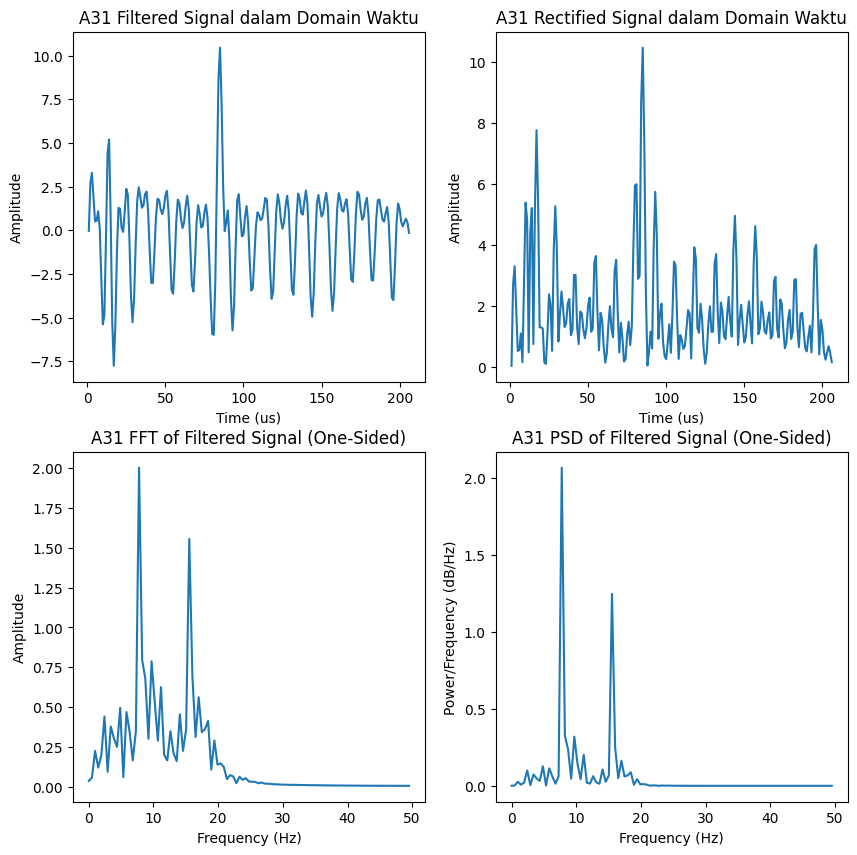

In [53]:
# A31
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, A31_filtered_signal)
axs[0, 0].set_title('A31 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, A31_rectified_signal)
axs[0, 1].set_title('A31 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')


axs[1, 0].plot(A31_freq, A31_fft_amp)
axs[1, 0].set_title('A31 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(A31_freq_psd, A31_psd_one_sided)
axs[1, 1].set_title('A31 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Abu_3cm_sampel_1.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

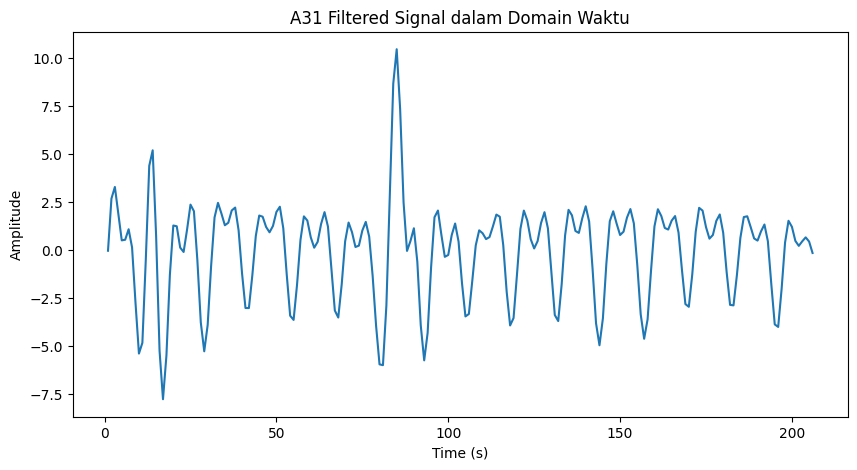

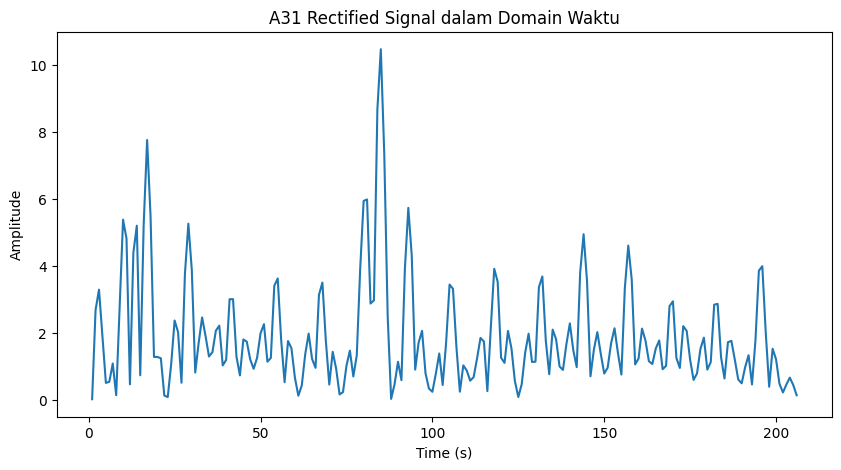

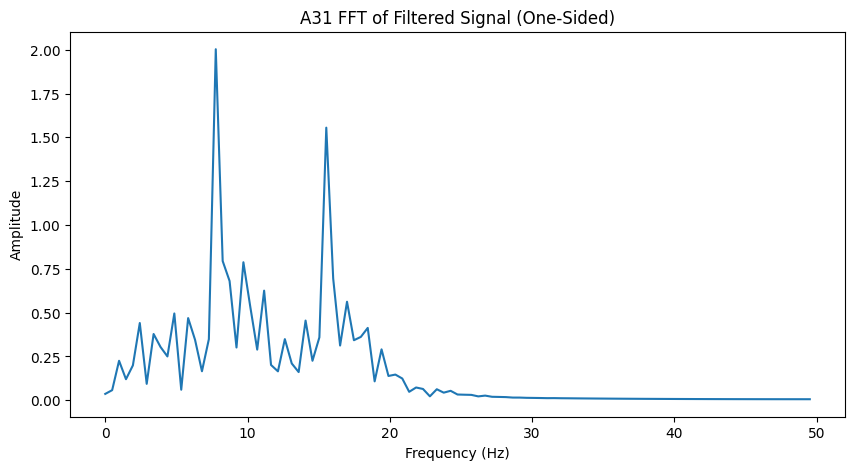

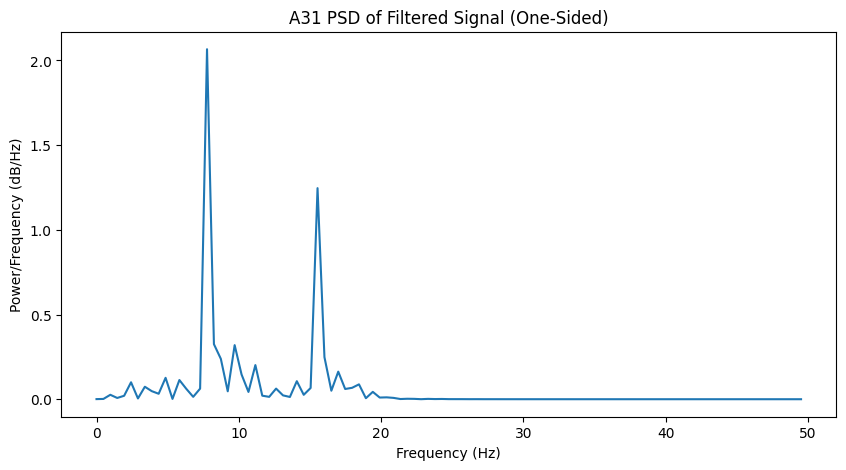

In [54]:
plt.figure(figsize=(10,5))
plt.plot(time, A31_filtered_signal)
plt.title('A31 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, A31_rectified_signal)
plt.title('A31 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A31_freq, A31_fft_amp)
plt.title('A31 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A31_freq_psd, A31_psd_one_sided)
plt.title('A31 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

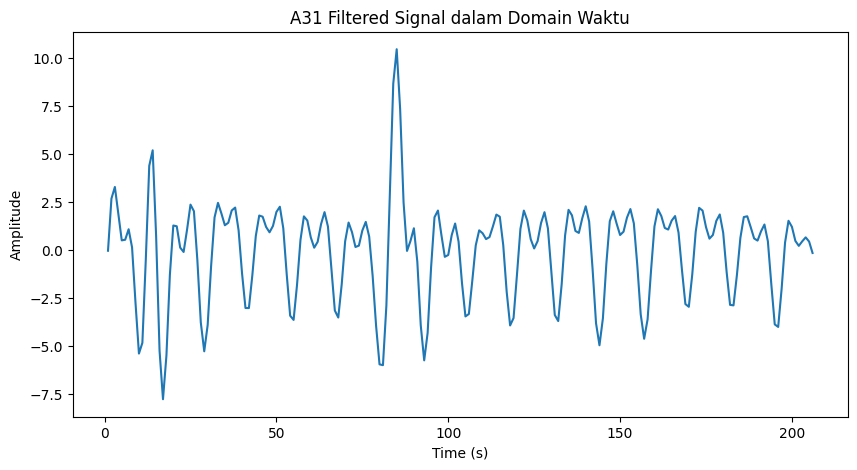

In [55]:
plt.figure(figsize=(10,5))
plt.plot(time, A31_filtered_signal)
plt.title('A31 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

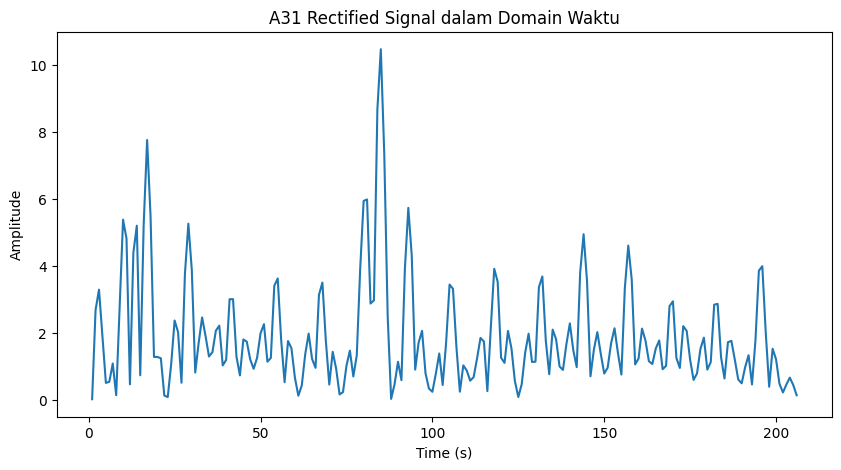

In [56]:
plt.figure(figsize=(10,5))
plt.plot(time, A31_rectified_signal)
plt.title('A31 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

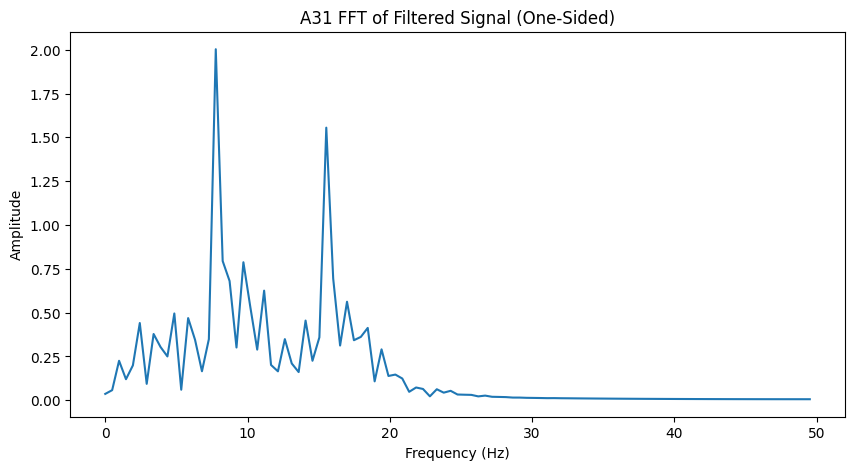

In [57]:
plt.figure(figsize=(10,5))
plt.plot(A31_freq, A31_fft_amp)
plt.title('A31 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

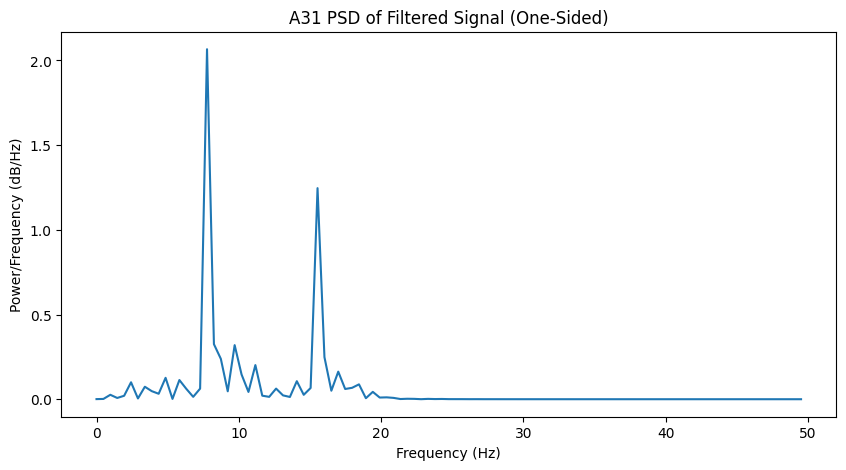

In [58]:
plt.figure(figsize=(10,5))
plt.plot(A31_freq_psd, A31_psd_one_sided)
plt.title('A31 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

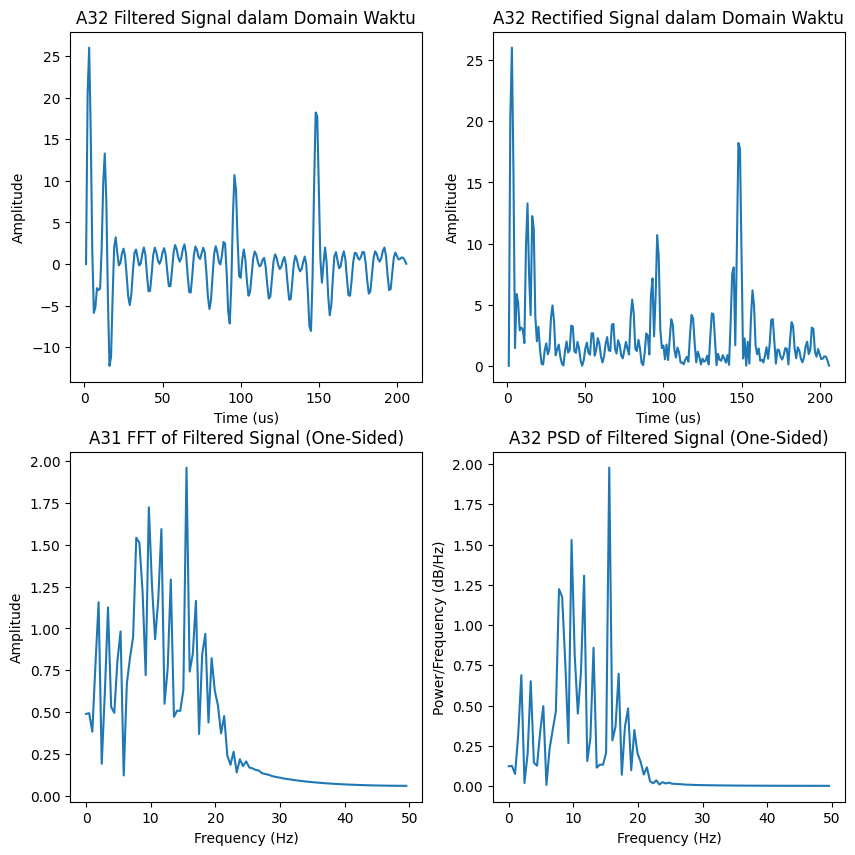

In [59]:
# A32
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, A32_filtered_signal)
axs[0, 0].set_title('A32 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, A32_rectified_signal)
axs[0, 1].set_title('A32 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(A32_freq, A32_fft_amp)
axs[1, 0].set_title('A31 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(A32_freq_psd, A32_psd_one_sided)
axs[1, 1].set_title('A32 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Abu_3cm_sampel_2.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

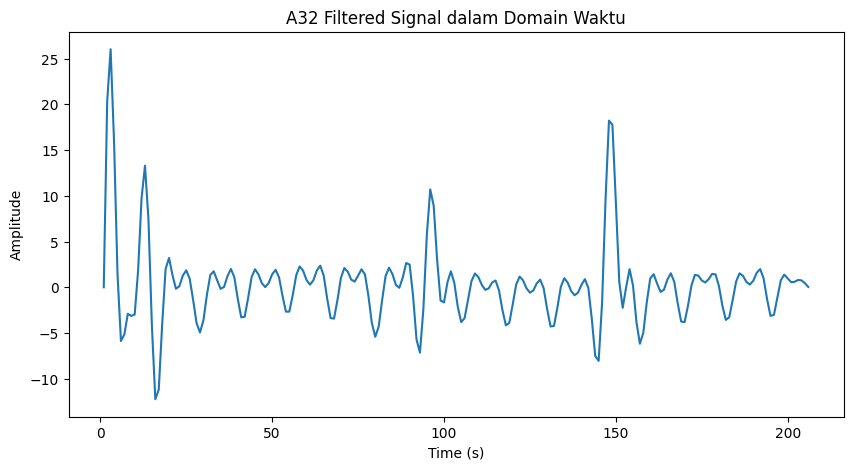

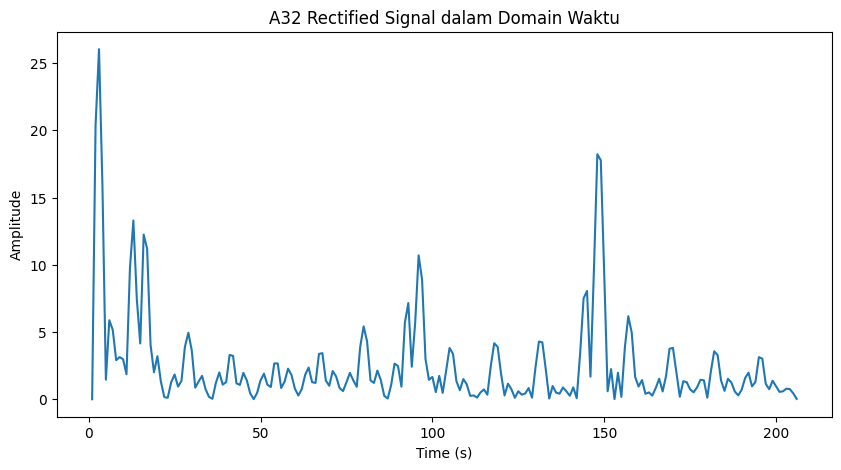

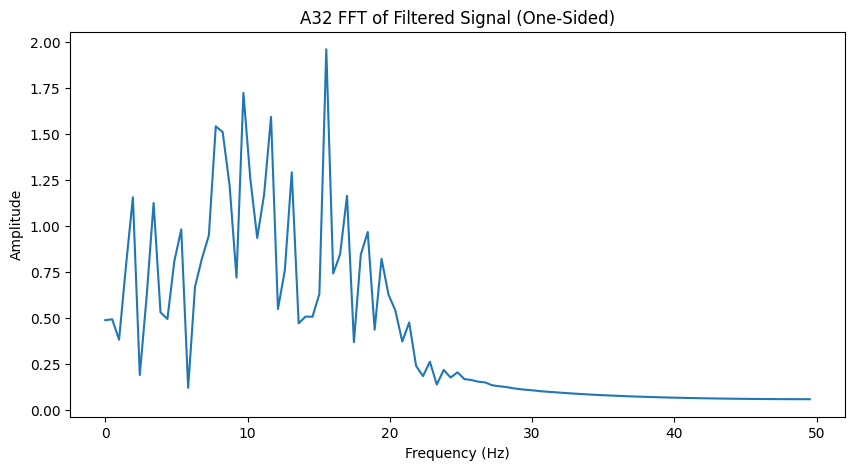

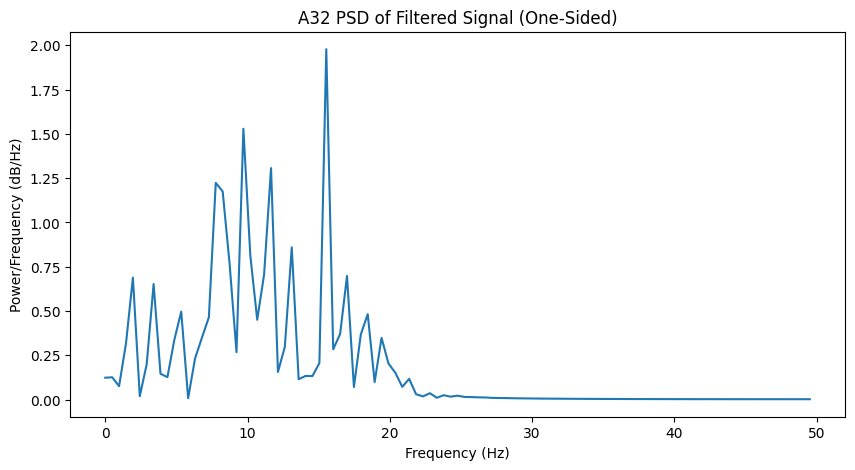

In [60]:
plt.figure(figsize=(10,5))
plt.plot(time, A32_filtered_signal)
plt.title('A32 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, A32_rectified_signal)
plt.title('A32 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A32_freq, A32_fft_amp)
plt.title('A32 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A32_freq_psd, A32_psd_one_sided)
plt.title('A32 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

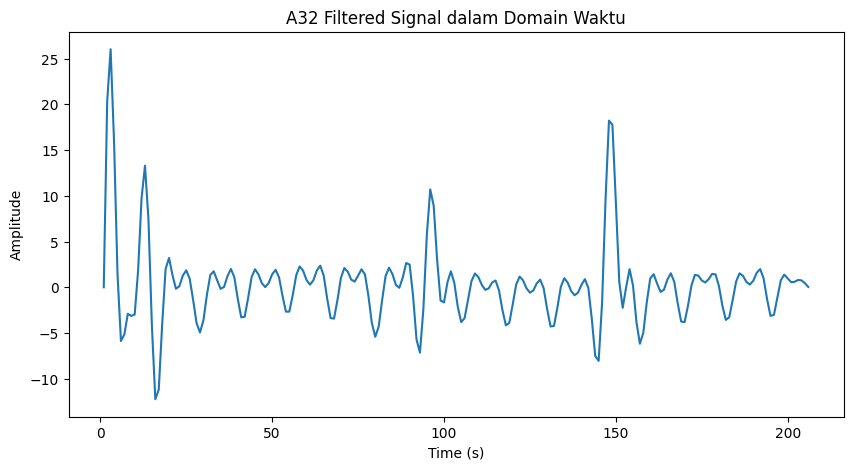

In [61]:
plt.figure(figsize=(10,5))
plt.plot(time, A32_filtered_signal)
plt.title('A32 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

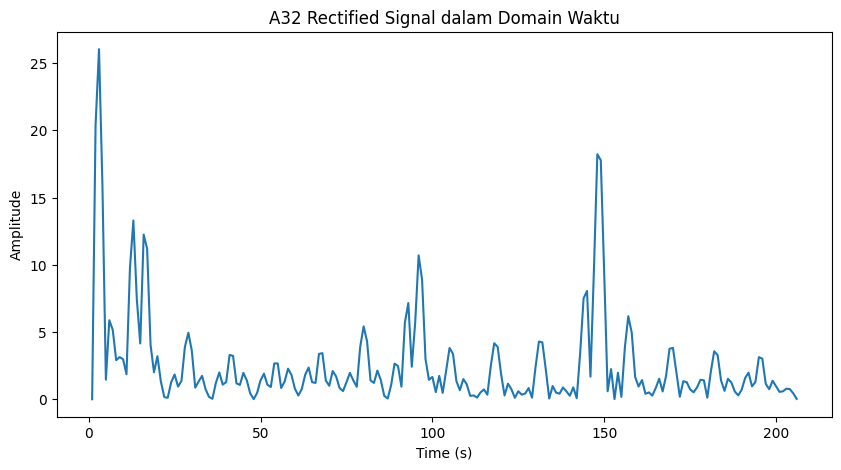

In [62]:
plt.figure(figsize=(10,5))
plt.plot(time, A32_rectified_signal)
plt.title('A32 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

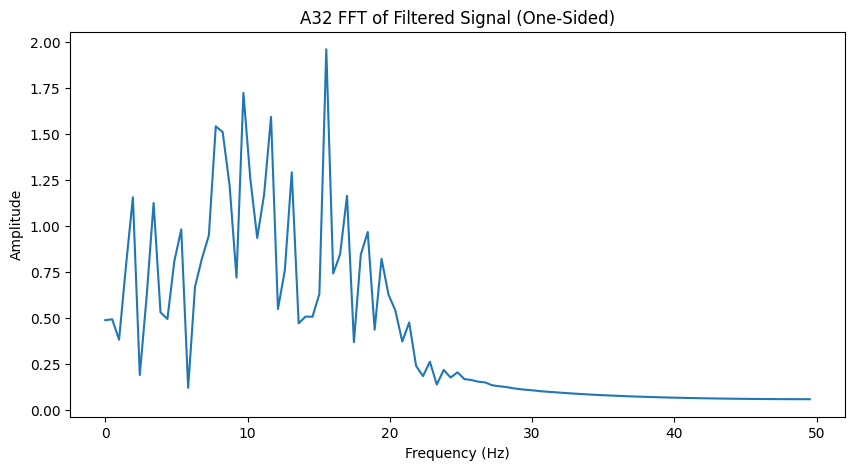

In [63]:
plt.figure(figsize=(10,5))
plt.plot(A32_freq, A32_fft_amp)
plt.title('A32 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

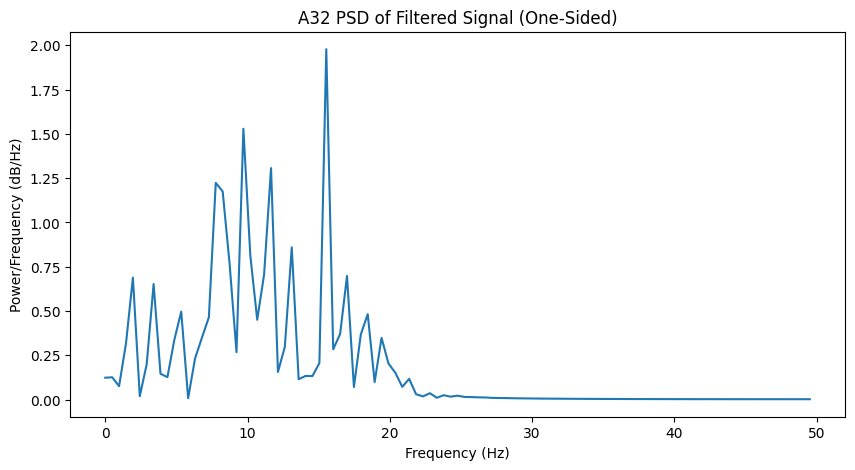

In [64]:
plt.figure(figsize=(10,5))
plt.plot(A32_freq_psd, A32_psd_one_sided)
plt.title('A32 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

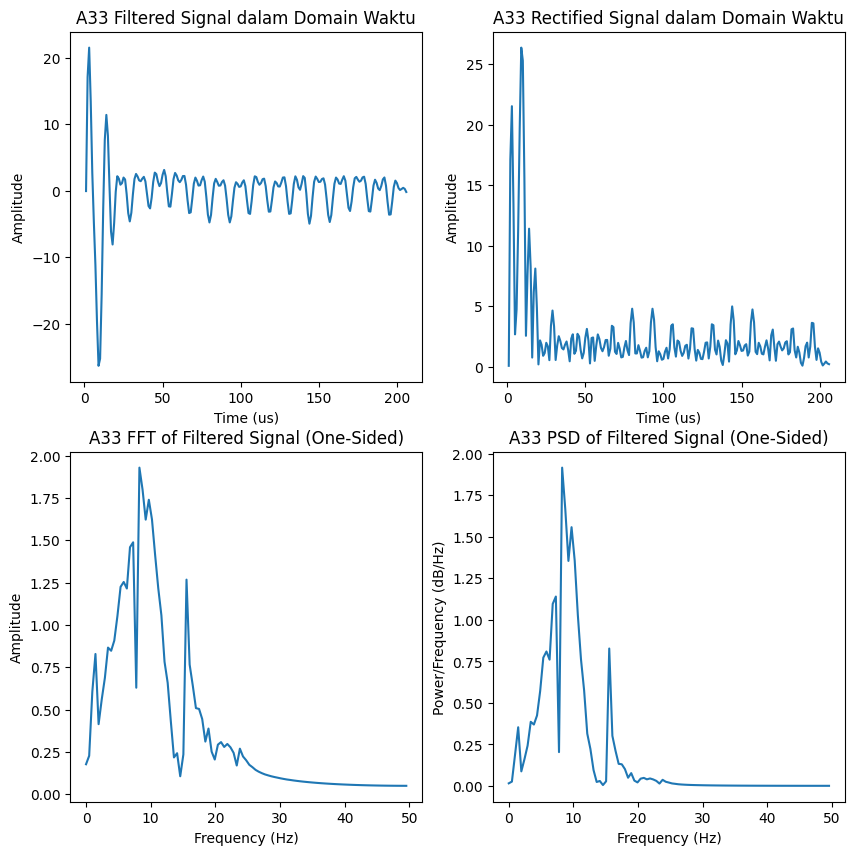

In [65]:
# A33
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, A33_filtered_signal)
axs[0, 0].set_title('A33 Filtered Signal dalam Domain Waktu')
axs[0, 0].set_xlabel('Time (us)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, A33_rectified_signal)
axs[0, 1].set_title('A33 Rectified Signal dalam Domain Waktu')
axs[0, 1].set_xlabel('Time (us)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(A33_freq, A33_fft_amp)
axs[1, 0].set_title('A33 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(A33_freq_psd, A33_psd_one_sided)
axs[1, 1].set_title('A33 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Abu_3cm_sampel_3.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

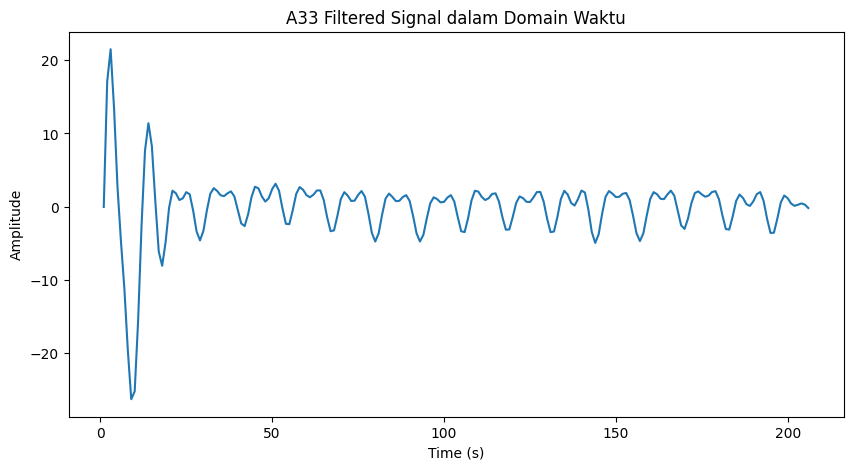

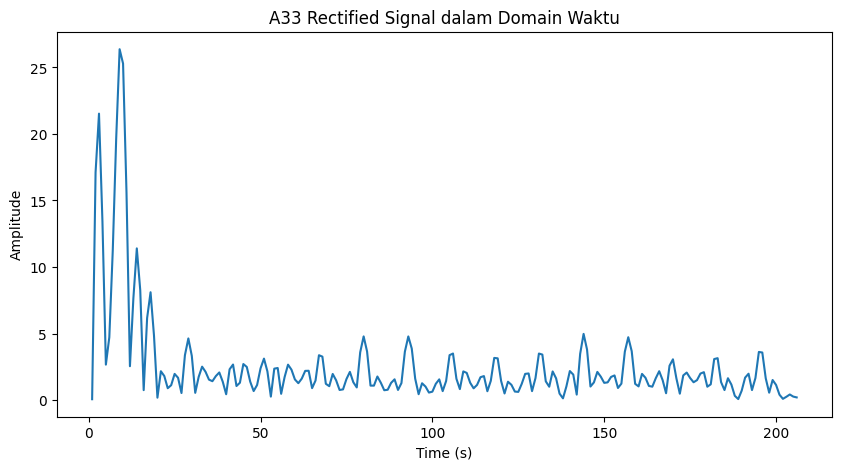

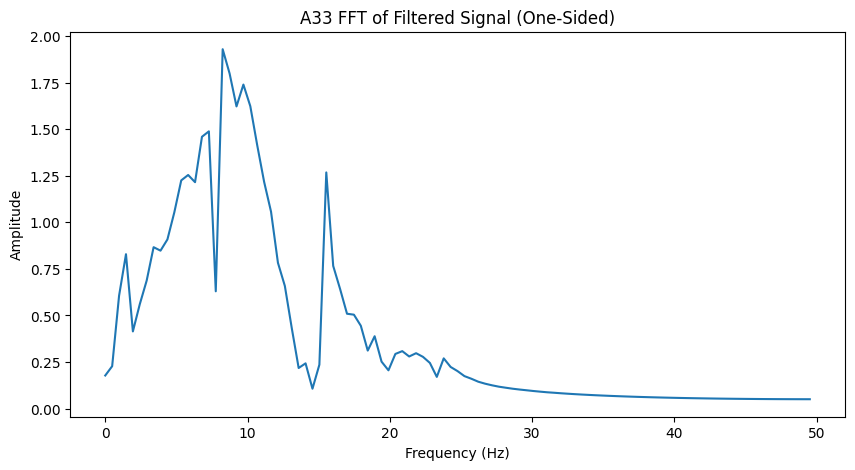

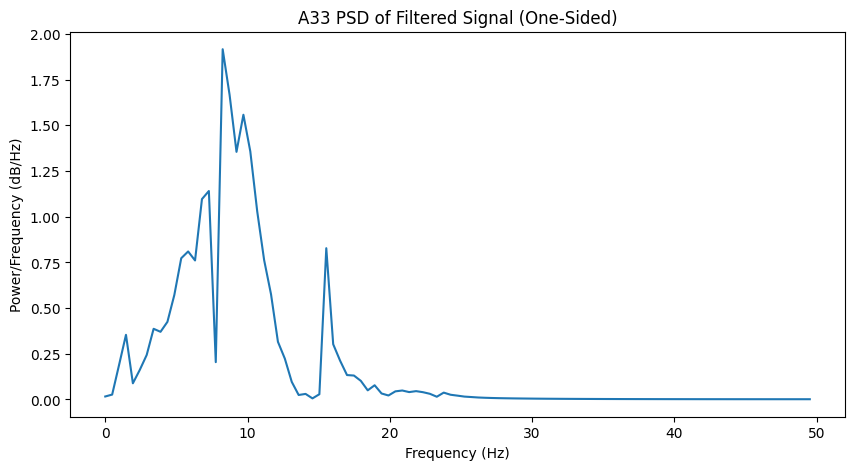

In [66]:
plt.figure(figsize=(10,5))
plt.plot(time, A33_filtered_signal)
plt.title('A33 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, A33_rectified_signal)
plt.title('A33 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A33_freq, A33_fft_amp)
plt.title('A33 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A33_freq_psd, A33_psd_one_sided)
plt.title('A33 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

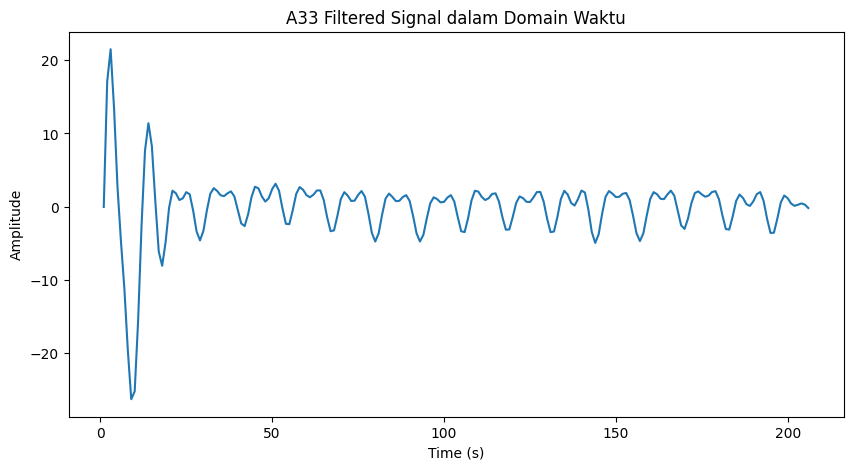

In [67]:
plt.figure(figsize=(10,5))
plt.plot(time, A33_filtered_signal)
plt.title('A33 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

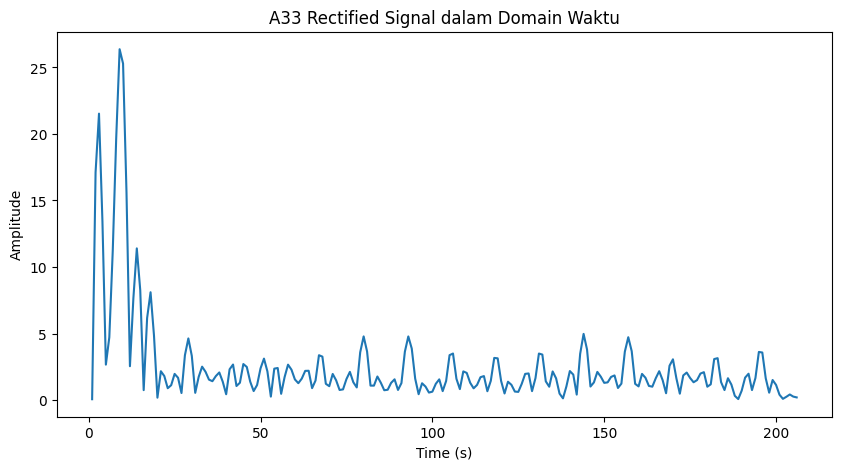

In [68]:
plt.figure(figsize=(10,5))
plt.plot(time, A33_rectified_signal)
plt.title('A33 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

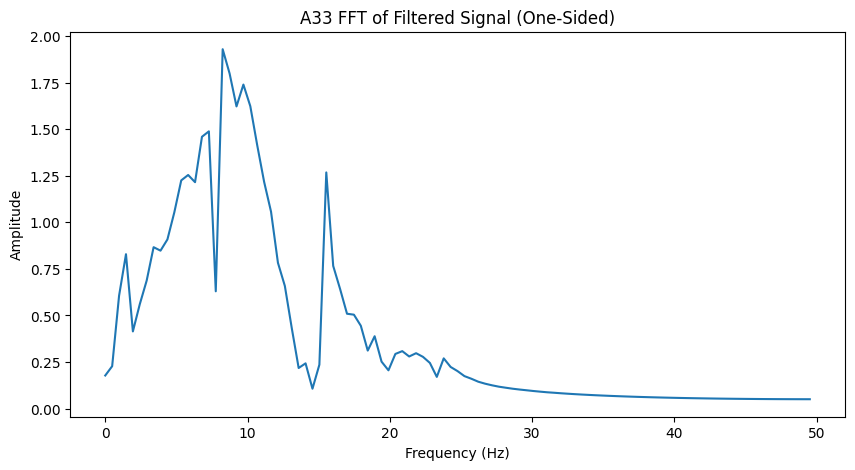

In [69]:
plt.figure(figsize=(10,5))
plt.plot(A33_freq, A33_fft_amp)
plt.title('A33 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

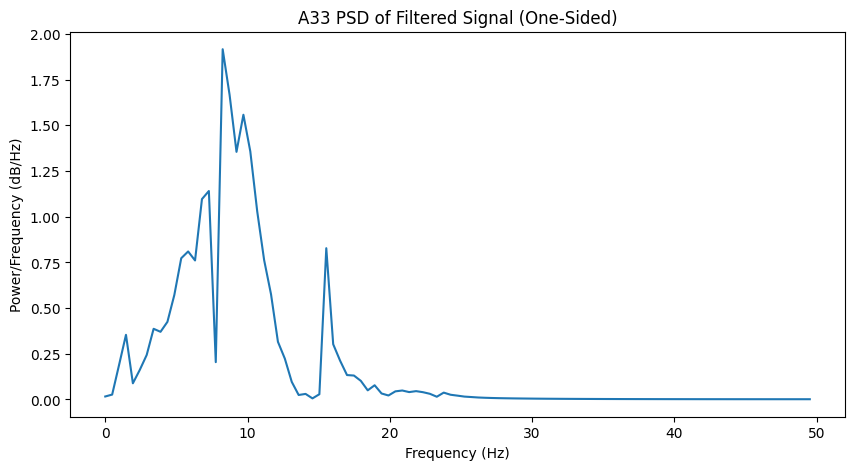

In [70]:
plt.figure(figsize=(10,5))
plt.plot(A33_freq_psd, A33_psd_one_sided)
plt.title('A33 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

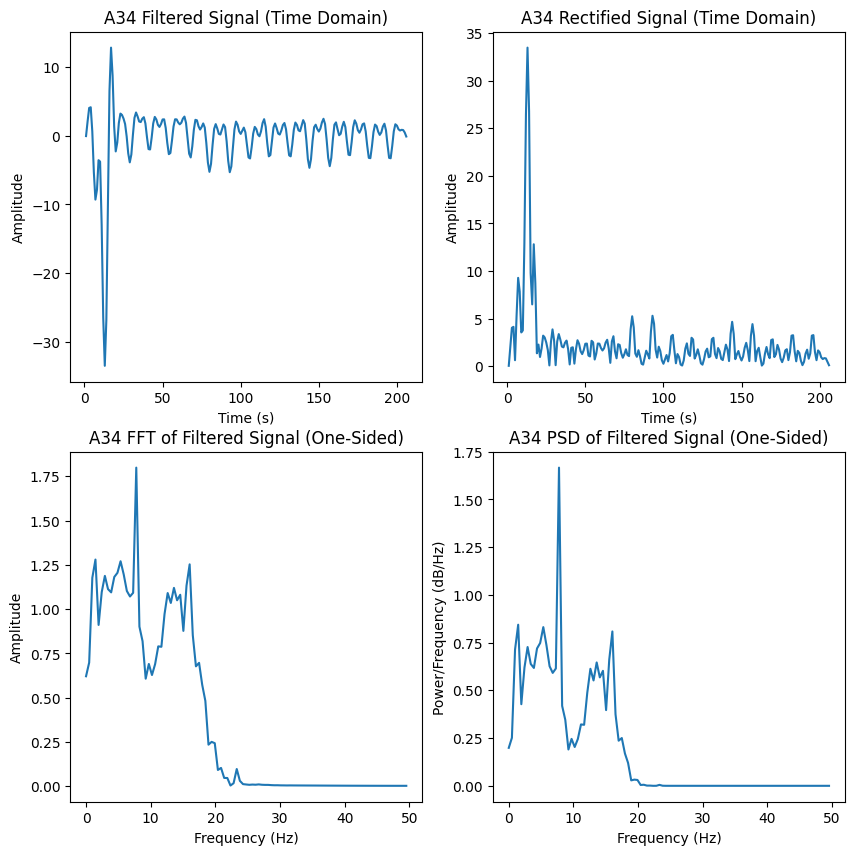

In [71]:
# A34
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, A34_filtered_signal)
axs[0, 0].set_title('A34 Filtered Signal (Time Domain)')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, A34_rectified_signal)
axs[0, 1].set_title('A34 Rectified Signal (Time Domain)')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(A34_freq, A34_fft_amp)
axs[1, 0].set_title('A34 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(A34_freq_psd, A34_psd_one_sided)
axs[1, 1].set_title('A34 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Abu_3cm_sampel_4.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

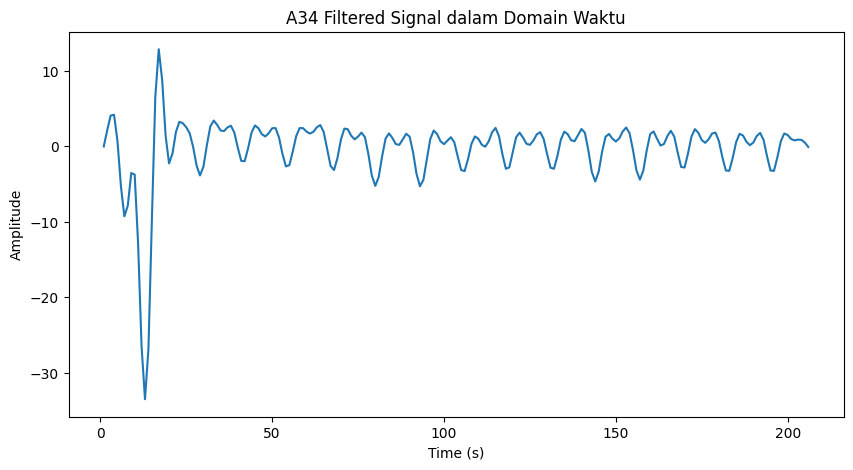

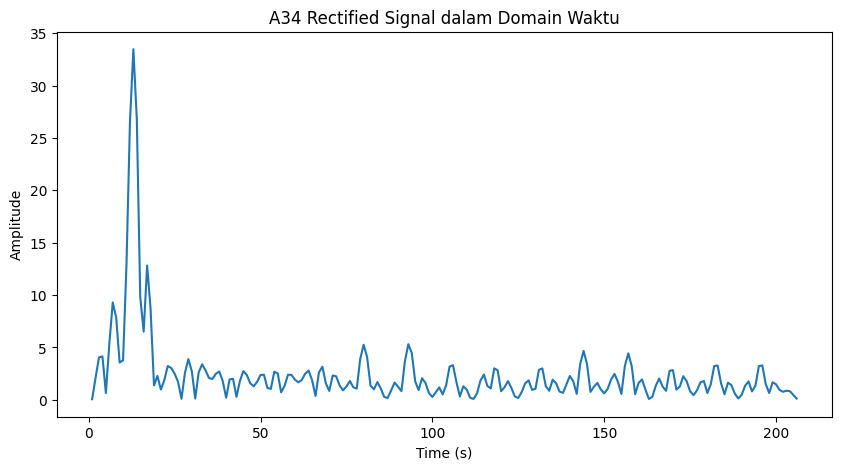

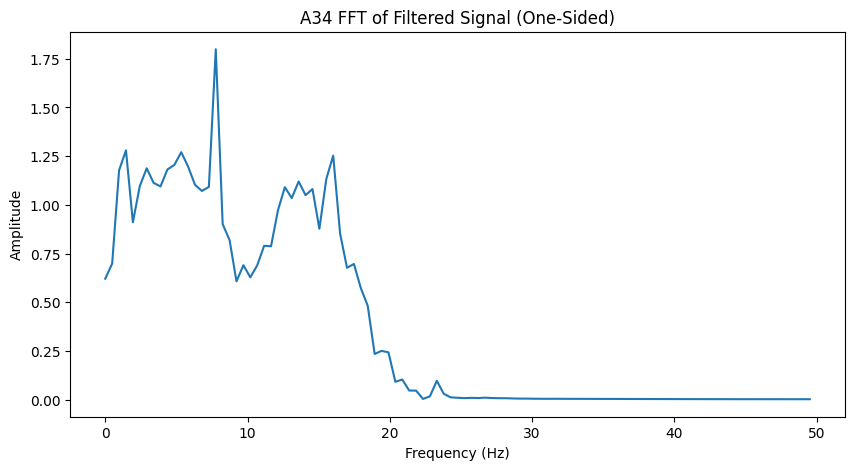

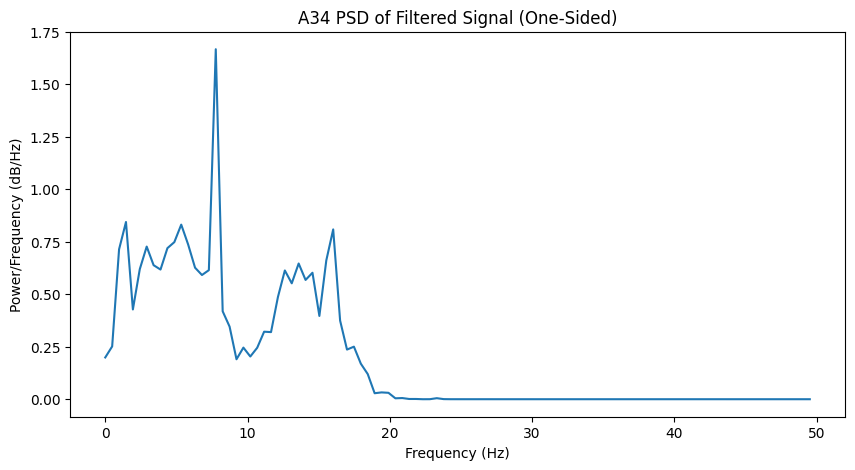

In [72]:
plt.figure(figsize=(10,5))
plt.plot(time, A34_filtered_signal)
plt.title('A34 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, A34_rectified_signal)
plt.title('A34 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A34_freq, A34_fft_amp)
plt.title('A34 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A34_freq_psd, A34_psd_one_sided)
plt.title('A34 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

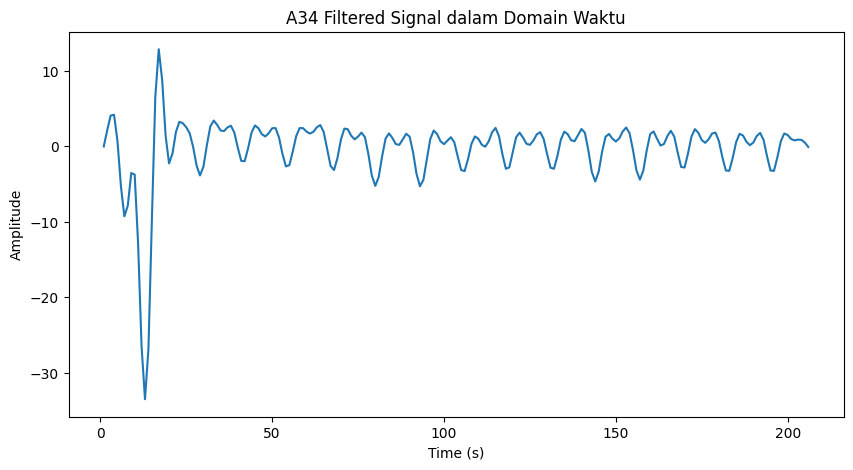

In [73]:
plt.figure(figsize=(10,5))
plt.plot(time, A34_filtered_signal)
plt.title('A34 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

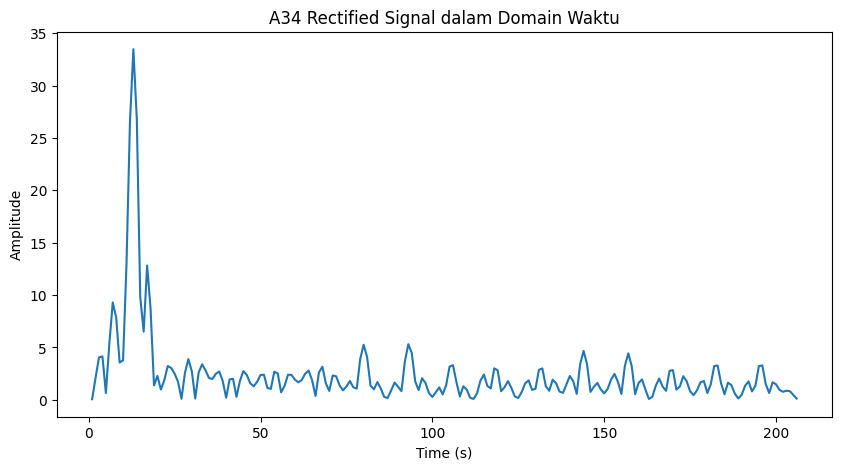

In [74]:
plt.figure(figsize=(10,5))
plt.plot(time, A34_rectified_signal)
plt.title('A34 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

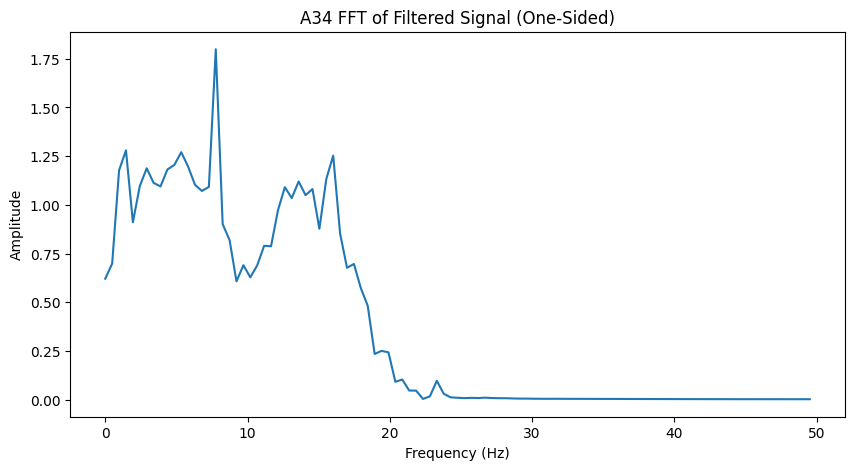

In [75]:
plt.figure(figsize=(10,5))
plt.plot(A34_freq, A34_fft_amp)
plt.title('A34 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

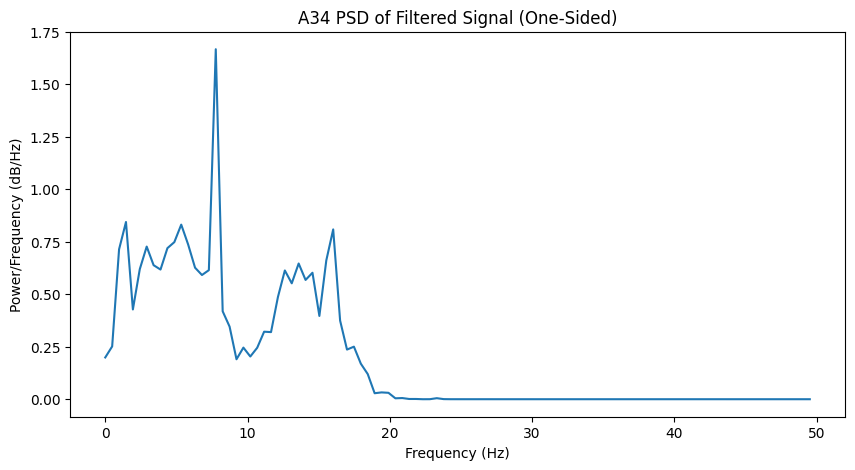

In [76]:
plt.figure(figsize=(10,5))
plt.plot(A34_freq_psd, A34_psd_one_sided)
plt.title('A34 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

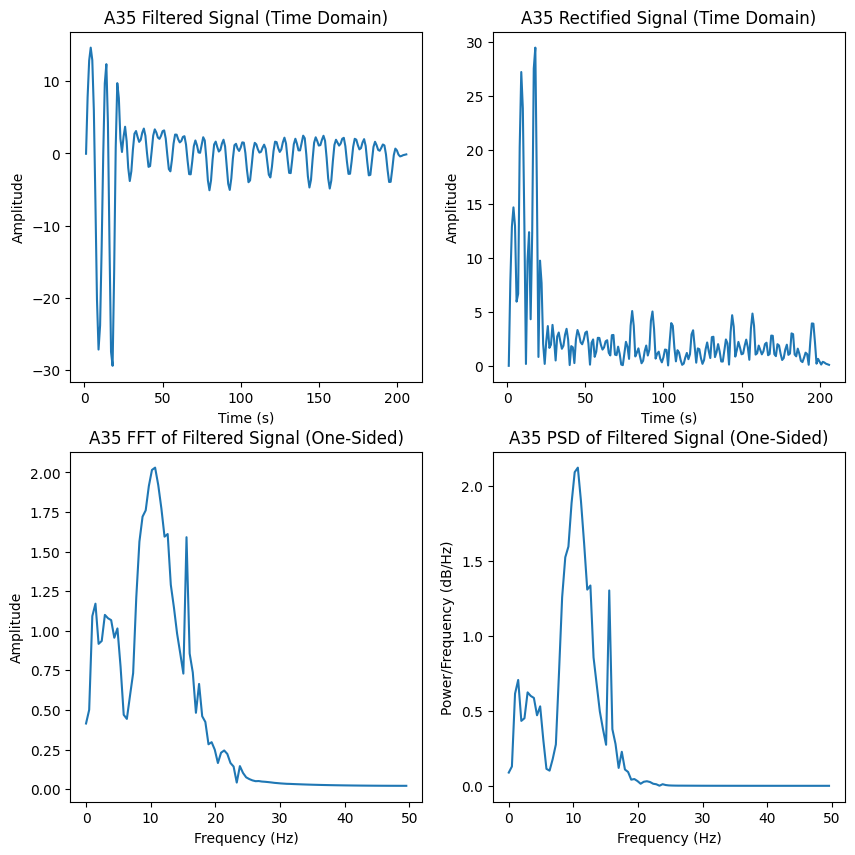

In [77]:
# A35
# Plot the results
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0, 0].plot(time, A35_filtered_signal)
axs[0, 0].set_title('A35 Filtered Signal (Time Domain)')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Amplitude')

axs[0, 1].plot(time, A35_rectified_signal)
axs[0, 1].set_title('A35 Rectified Signal (Time Domain)')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 0].plot(A35_freq, A35_fft_amp)
axs[1, 0].set_title('A35 FFT of Filtered Signal (One-Sided)')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Amplitude')

axs[1, 1].plot(A35_freq_psd, A35_psd_one_sided)
axs[1, 1].set_title('A35 PSD of Filtered Signal (One-Sided)')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power/Frequency (dB/Hz)')

plt.savefig('Abu_3cm_sampel_5.png', dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

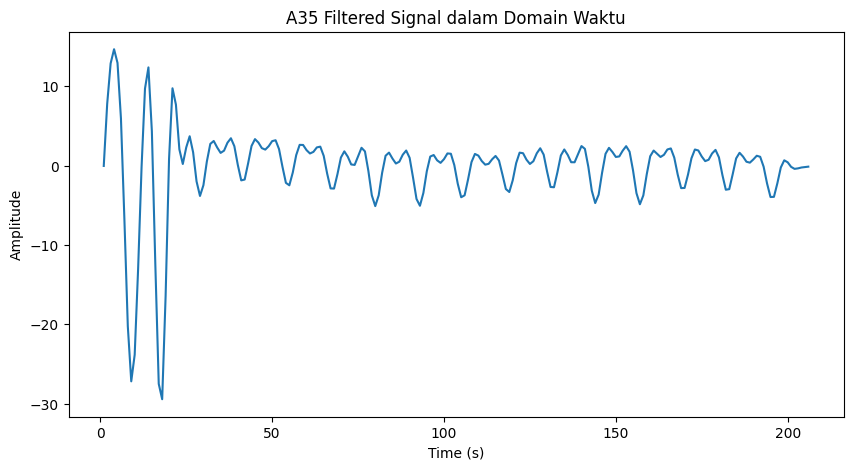

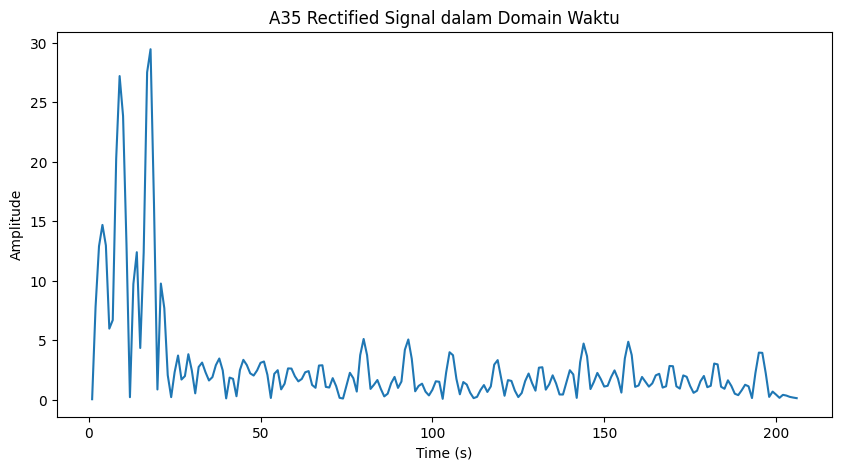

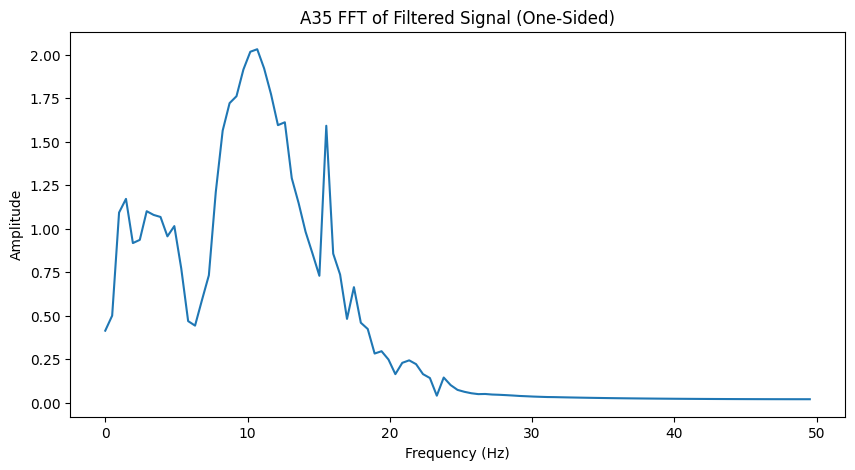

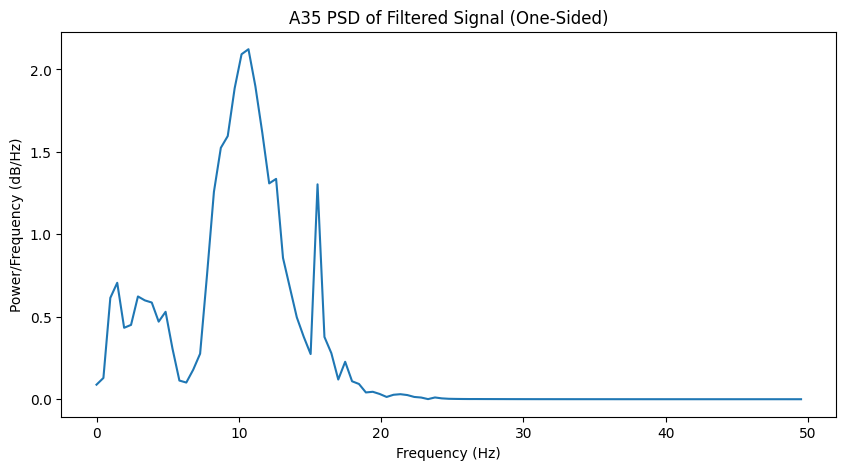

In [78]:
plt.figure(figsize=(10,5))
plt.plot(time, A35_filtered_signal)
plt.title('A35 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(time, A35_rectified_signal)
plt.title('A35 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A35_freq, A35_fft_amp)
plt.title('A35 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.figure(figsize=(10,5))
plt.plot(A35_freq_psd, A35_psd_one_sided)
plt.title('A35 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show

Text(0, 0.5, 'Amplitude')

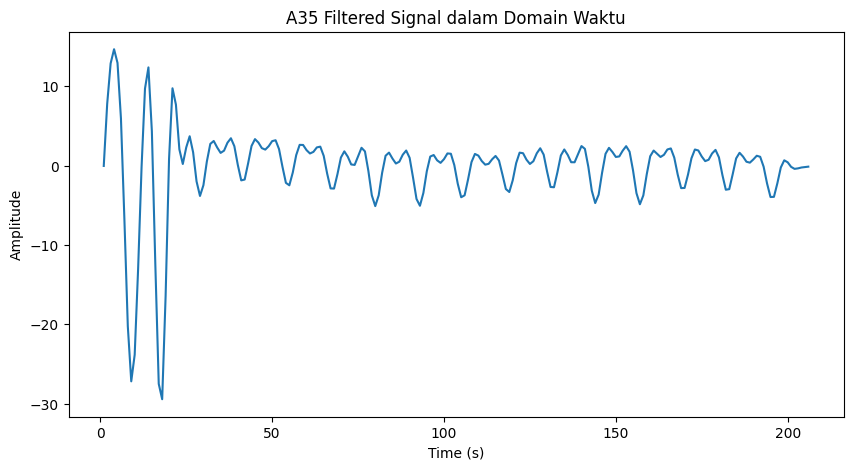

In [79]:
plt.figure(figsize=(10,5))
plt.plot(time, A35_filtered_signal)
plt.title('A35 Filtered Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

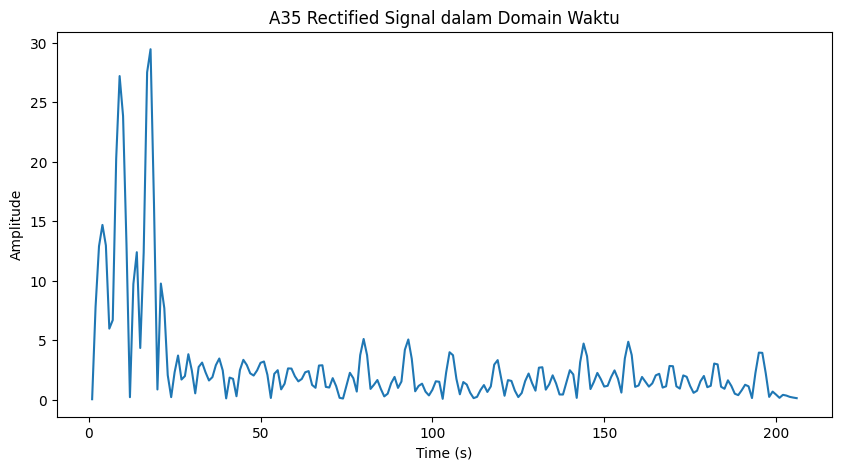

In [80]:
plt.figure(figsize=(10,5))
plt.plot(time, A35_rectified_signal)
plt.title('A35 Rectified Signal dalam Domain Waktu')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

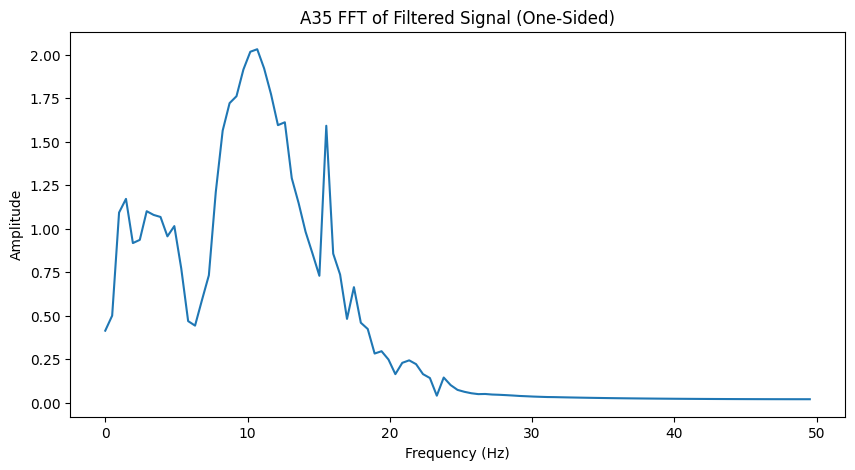

In [81]:
plt.figure(figsize=(10,5))
plt.plot(A35_freq, A35_fft_amp)
plt.title('A35 FFT of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

<function matplotlib.pyplot.show(close=None, block=None)>

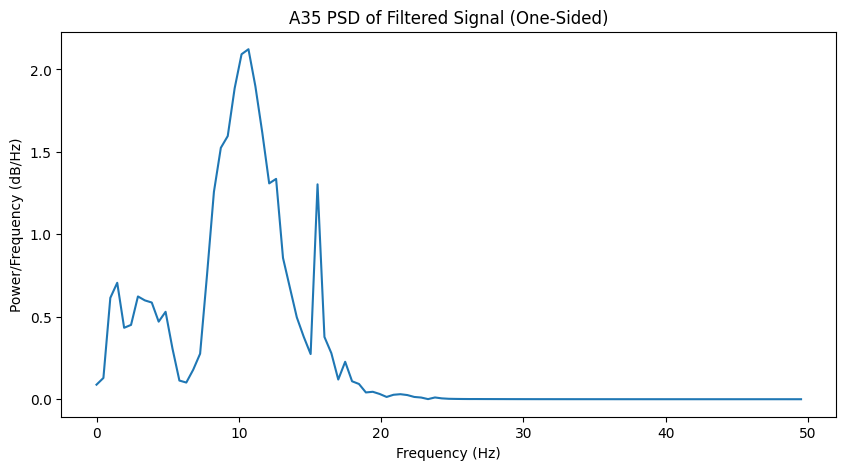

In [82]:
plt.figure(figsize=(10,5))
plt.plot(A35_freq_psd, A35_psd_one_sided)
plt.title('A35 PSD of Filtered Signal (One-Sided)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show